# Lending club case study

## Introduction
Here we are going to anylyse coustomer's data from a bank and profile the coustomers weathere lending money to coustomer is a risky or a safe investment.
## Risk assement
* If the bank rejects loan to the coustomers who are likely to repay, Bank might loose business.
* If the bank lends loan to the coustomers who are not likely to repay, Bank might have financial loss.

## Discisions
* Loan rejected - No transaction with the bank any further.
* Loan accepted
    - Fully paid on time
    - Cuurent Loan has not metured yet, coustomer is paying all the payements on time.
    - Defaulted, coustomer has failed to make payment on time.

In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.plotting.backend = "plotly"

In [2]:
#Read the data and explore it
loan = pd.read_csv("loan.csv")
loan.head()

/Users/rabia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Explore the shape of the data, we have 111 columns and almost 40k entries
loan.shape

(39717, 111)

## Data Cleaning
Table is very big with lot of coloums before going any further we need to start cleaning up the data.

Lets Make sure we have unique id for every entry. We have 39717 unique Id for 39717 entry. OK !

In [4]:
loan.id.nunique()

39717

In [5]:
#Review the summary statistics for the numeric columns
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


The following columns will be deleted because we do not need it in our analysis:
<br>
<br>**desc** : There is a lot of describition and we have tens of thousands different descriptions.
<br>**emp_title** : two many unique values and it is going very hard to get insights out of it (28,820 unique values).
<br>**initial_list_status** : All values equal "f", this column will not give any insight.
<br>**member_id** : We already have "id" column is unique identifier, we do not want another unique identifer.
<br>**next_pymnt_d** : We do not think the date of the next payment will have any value in this analysis.
<br>**policy_code** : All values equal "1", this column will not give any insight.
<br>**pymnt_plan** : All values equal "n", this column will not give any insight.
<br>**tax_liens** : All values equal "0" or missing value, this column will not give any insight.
<br>**url** : We do not think "url" can give any insight and we already have unique identifier column "Id".
<br>**application_type** : All values equal "INDIVIDUAL", this column will not give any insight.

In [6]:
#Drop the useless columns
coloumn_drop_list = ["desc", "emp_title", "initial_list_status", "member_id", "next_pymnt_d", "policy_code", 
                     "pymnt_plan", "tax_liens", "url", "application_type"]
loan.drop(coloumn_drop_list, inplace=True, axis=1)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Filter out all the columns which all values are missing. These columns will provide no insight  since it has no values

In [7]:
#create a list of columns with all values are missing
NA_columns = list(loan.columns[loan.isna().all()])

In [8]:
# Delete all the NA Columns
loan.drop(NA_columns, inplace=True, axis=1)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,0.00,0.00,Jan-15,171.62,May-16,0.0,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,0.00,0.00,Jun-14,649.91,May-16,0.0,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0,0.0,0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,0.00,0.00,May-16,67.79,May-16,0.0,0,0.0,0,0.0


We have identified an embeded space at the begaining of "term" column and we are deleting it using the following code

In [9]:
loan.term = loan.term.str.lstrip()

Convert the type of the columns "int_rate" and "revol_util" from string to float

In [10]:
loan.int_rate = loan.int_rate.str.rstrip('%').astype('float')
loan.revol_util = loan.revol_util.str.rstrip('%').astype('float')

Convert they type of "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d", and "issue_d from string to Datetime

In [11]:
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')

Exclude any columns with all values equal to Zero

In [12]:
#Filter the data to exclude any column with all values equal to Zero
loan = loan.loc[:, (loan != 0).any(axis=0)]

In [13]:
# show summary statistics to all numeric variables
loan.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39661.0,39020.000000
mean,6.831319e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,0.0,0.043260
std,2.106941e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.204324
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,5.162210e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,0.0,0.000000
50%,6.656650e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,0.0,0.000000
75%,8.377550e+05,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,0.0,0.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,2.000000


These 2 columns have a mix of Zeros and missing values, we are deleting them too

In [14]:
# Delete the 2 columns
Del_columns = ['chargeoff_within_12_mths', 'collections_12_mths_ex_med']
loan.drop(Del_columns, inplace=True, axis=1)

## Missing Values
<br>
<br> First we have to look for columns with any missing values

In [15]:
#explore the information about all columns in the dataframe
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   loan_amnt                39717 non-null  int64         
 2   funded_amnt              39717 non-null  int64         
 3   funded_amnt_inv          39717 non-null  float64       
 4   term                     39717 non-null  object        
 5   int_rate                 39717 non-null  float64       
 6   installment              39717 non-null  float64       
 7   grade                    39717 non-null  object        
 8   sub_grade                39717 non-null  object        
 9   emp_length               38642 non-null  object        
 10  home_ownership           39717 non-null  object        
 11  annual_inc               39717 non-null  float64       
 12  verification_status      39717 n

In [16]:
# List of the columns with any missing values
missing_columns = loan.columns[loan.isnull().any()]
missing_columns

Index(['emp_length', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [17]:
#Check the percentage of missing value for each column
(loan.isnull().sum() * 100 / len(loan)).sort_values(ascending=False)

mths_since_last_record     92.985372
mths_since_last_delinq     64.662487
emp_length                  2.706650
pub_rec_bankruptcies        1.754916
last_pymnt_d                0.178765
revol_util                  0.125891
title                       0.027696
last_credit_pull_d          0.005036
out_prncp                   0.000000
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
total_acc                   0.000000
out_prncp_inv               0.000000
collection_recovery_fee     0.000000
total_pymnt                 0.000000
total_rec_prncp             0.000000
last_pymnt_amnt             0.000000
total_rec_int               0.000000
total_rec_late_fee          0.000000
recoveries                  0.000000
total_pymnt_inv             0.000000
id                          0.000000
inq_last_6mths              0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
t

**mths_since_last_record** : This column has a significant high missing values, We think dropping it from the analysis will be more benificial than keeping it.
<br>
<br>**mths_since_last_delinq** : This column has a high missing values percentage (~65%), and we have another column reporting the delinquency within ht elast 2 years. We think droping this column is the best approach

In [18]:
#drop the columns
loan.drop('mths_since_last_record', inplace=True, axis=1)
loan.drop('mths_since_last_delinq', inplace=True, axis=1)

**emp_length
<br>pub_rec_bankruptcies
<br>last_pymnt_d
<br>revol_util
<br>title
<br>last_credit_pull_d**
<br>
<br>These columns has a low missing values percentage (0.005 - 2.7%). These columns are not good to impute with mean or mode. It is better to remove the rows with missing values from these columns and we will lose only 2.7% of the data

In [19]:
#Removing any rows with missing values
loan = loan.dropna()

Now we have a dataframe with No missing values contains 37,825 rows

In [20]:
#information of the dataframe columns after dealing with missing values
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37825 entries, 0 to 39680
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       37825 non-null  int64         
 1   loan_amnt                37825 non-null  int64         
 2   funded_amnt              37825 non-null  int64         
 3   funded_amnt_inv          37825 non-null  float64       
 4   term                     37825 non-null  object        
 5   int_rate                 37825 non-null  float64       
 6   installment              37825 non-null  float64       
 7   grade                    37825 non-null  object        
 8   sub_grade                37825 non-null  object        
 9   emp_length               37825 non-null  object        
 10  home_ownership           37825 non-null  object        
 11  annual_inc               37825 non-null  float64       
 12  verification_status      37825 n

## Outliers

In [21]:
#Careate a list of numeric columns
numeric_columns = loan.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

Drop column **"id"** since it will be used as a refference and not for analysis so we do not need to think about outliers for this column

In [22]:
#Drop additional columns from the numeric_columns list
numeric_columns = numeric_columns.drop(['id', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies'])

In [23]:
numeric_columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt'],
      dtype='object')

In [24]:
#Create a dataframe of numeric columns only for the purpose of isolating them from the categorical variables
loan_n = loan[numeric_columns]

In [25]:
#Create a table showing all numeric columns with important statistics and the upper and lower limits of the data.
Q1 = loan_n.quantile(0.25)
Q3 = loan_n.quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

mean = loan_n.mean()
median = loan_n.quantile(0.5)
maximum = loan_n.max()
minimum = loan_n.min()

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.concat([lower_limit, upper_limit, mean, median, minimum, maximum], axis=1, keys=['lower_limit', 'upper_limit', 
                                                                                    'mean', 'median', 'minimum', 
                                                                                    'maximum'])

,lower_limit,upper_limit,mean,median,minimum,maximum
loan_amnt,-8500.00,29100.00,11328.78,10000.00,500.00,35000.00
funded_amnt,-8750.00,29250.00,11050.90,10000.00,500.00,35000.00
funded_amnt_inv,-9413.06,29021.77,10618.93,9200.00,0.00,35000.00
int_rate,1.39,22.54,12.07,11.86,5.42,24.59
installment,-230.27,833.76,327.16,283.20,16.08,1305.19
annual_inc,-20500.00,145900.00,69675.60,60000.00,4000.00,6000000.00
dti,-7.27,34.17,13.38,13.47,0.00,29.99
open_acc,-3.00,21.00,9.33,9.00,2.00,44.00
revol_bal,-16299.00,37277.00,13482.27,8979.00,0.00,149588.00
revol_util,-44.40,142.80,49.13,49.70,0.00,99.90


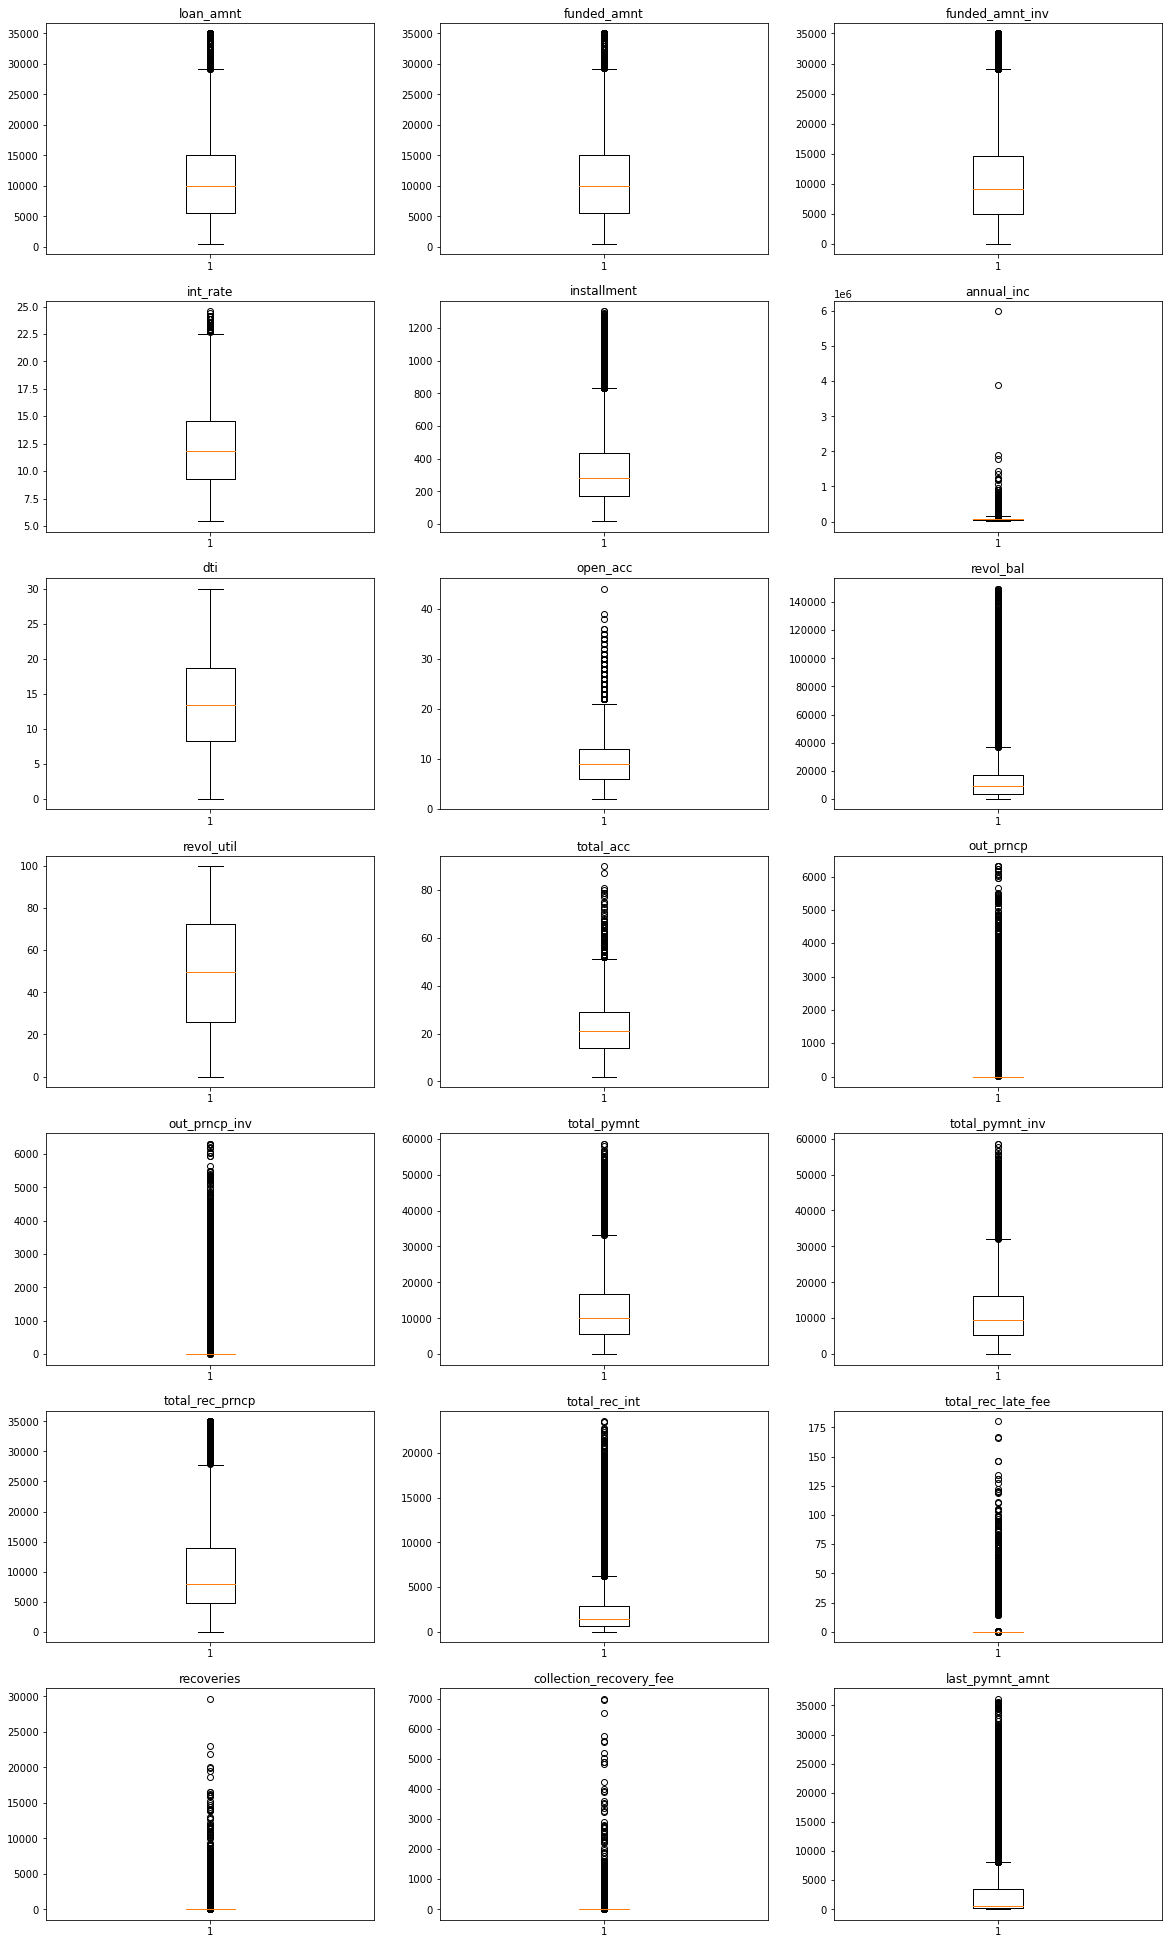

In [26]:
#Visulize the columns and outliers using box plot
plt.figure(figsize = (20,40))
for i in range(0, len(numeric_columns)):
    plt.subplot(8,3,i+1)
    plt.boxplot(loan[numeric_columns[i]])
    plt.title(numeric_columns[i])

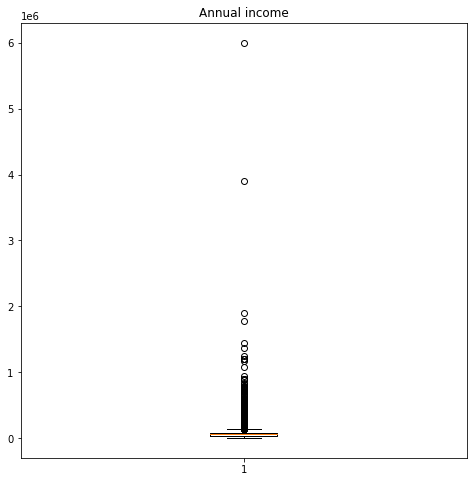

In [27]:
plt.figure(figsize = (8,8))
plt.boxplot(loan["annual_inc"])
plt.title("Annual income")
plt.savefig('annual_inc.png')
plt.show()

If we remove all outliers we will lose more than 40% of the data and this is abif chunk of data, as shown in the box plot above,we can see that annual_inc column y axis in the bix plot is using log due to the large difference between the values. 
<br>
<br> In the below code we will remove all rows with annual income more the upper boundry of the box plot.

In [28]:
#Define the upper boundry of the Annual Income
upper_annual_inc = loan.annual_inc.quantile(0.75) + 1.5 * (loan.annual_inc.quantile(0.75) - loan.annual_inc.quantile(0.25))

In [29]:
#Creat a new dataframe "Loan_Clean" which include all rows with anual income less than the upper boundry and which
# is not a current loan.
#Also two other lists are created if we need to do more analysis. One if for currrent loans with the anunual income 
#upper boundry, and the other is for all loans where hte annual icnome is higher than the upper boundry
loan_clean = loan.loc[(loan['annual_inc'] <= upper_annual_inc) & (loan['loan_status'] != "Current")]
loan_current = loan.loc[(loan['annual_inc'] <= upper_annual_inc) & (loan['loan_status'] == "Current")]
loan_high = loan.loc[(loan['annual_inc'] > upper_annual_inc) & (loan['loan_status'] != "Current")]

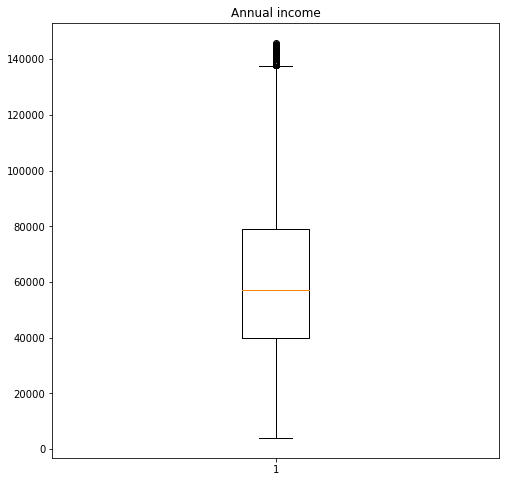

In [30]:
plt.figure(figsize = (8,8))
plt.boxplot(loan_clean["annual_inc"])
plt.title("Annual income")
plt.savefig('clean_annual_inc.png')
plt.show()

In [31]:
100*(1 - loan_clean["annual_inc"].sum()/loan["annual_inc"].sum())

17.76113044045069

In [32]:
loan_clean["annual_inc"].describe()

count    35023.00
mean     61884.72
std      28134.89
min       4000.00
25%      40000.00
50%      57000.00
75%      79000.00
max     145900.00
Name: annual_inc, dtype: float64

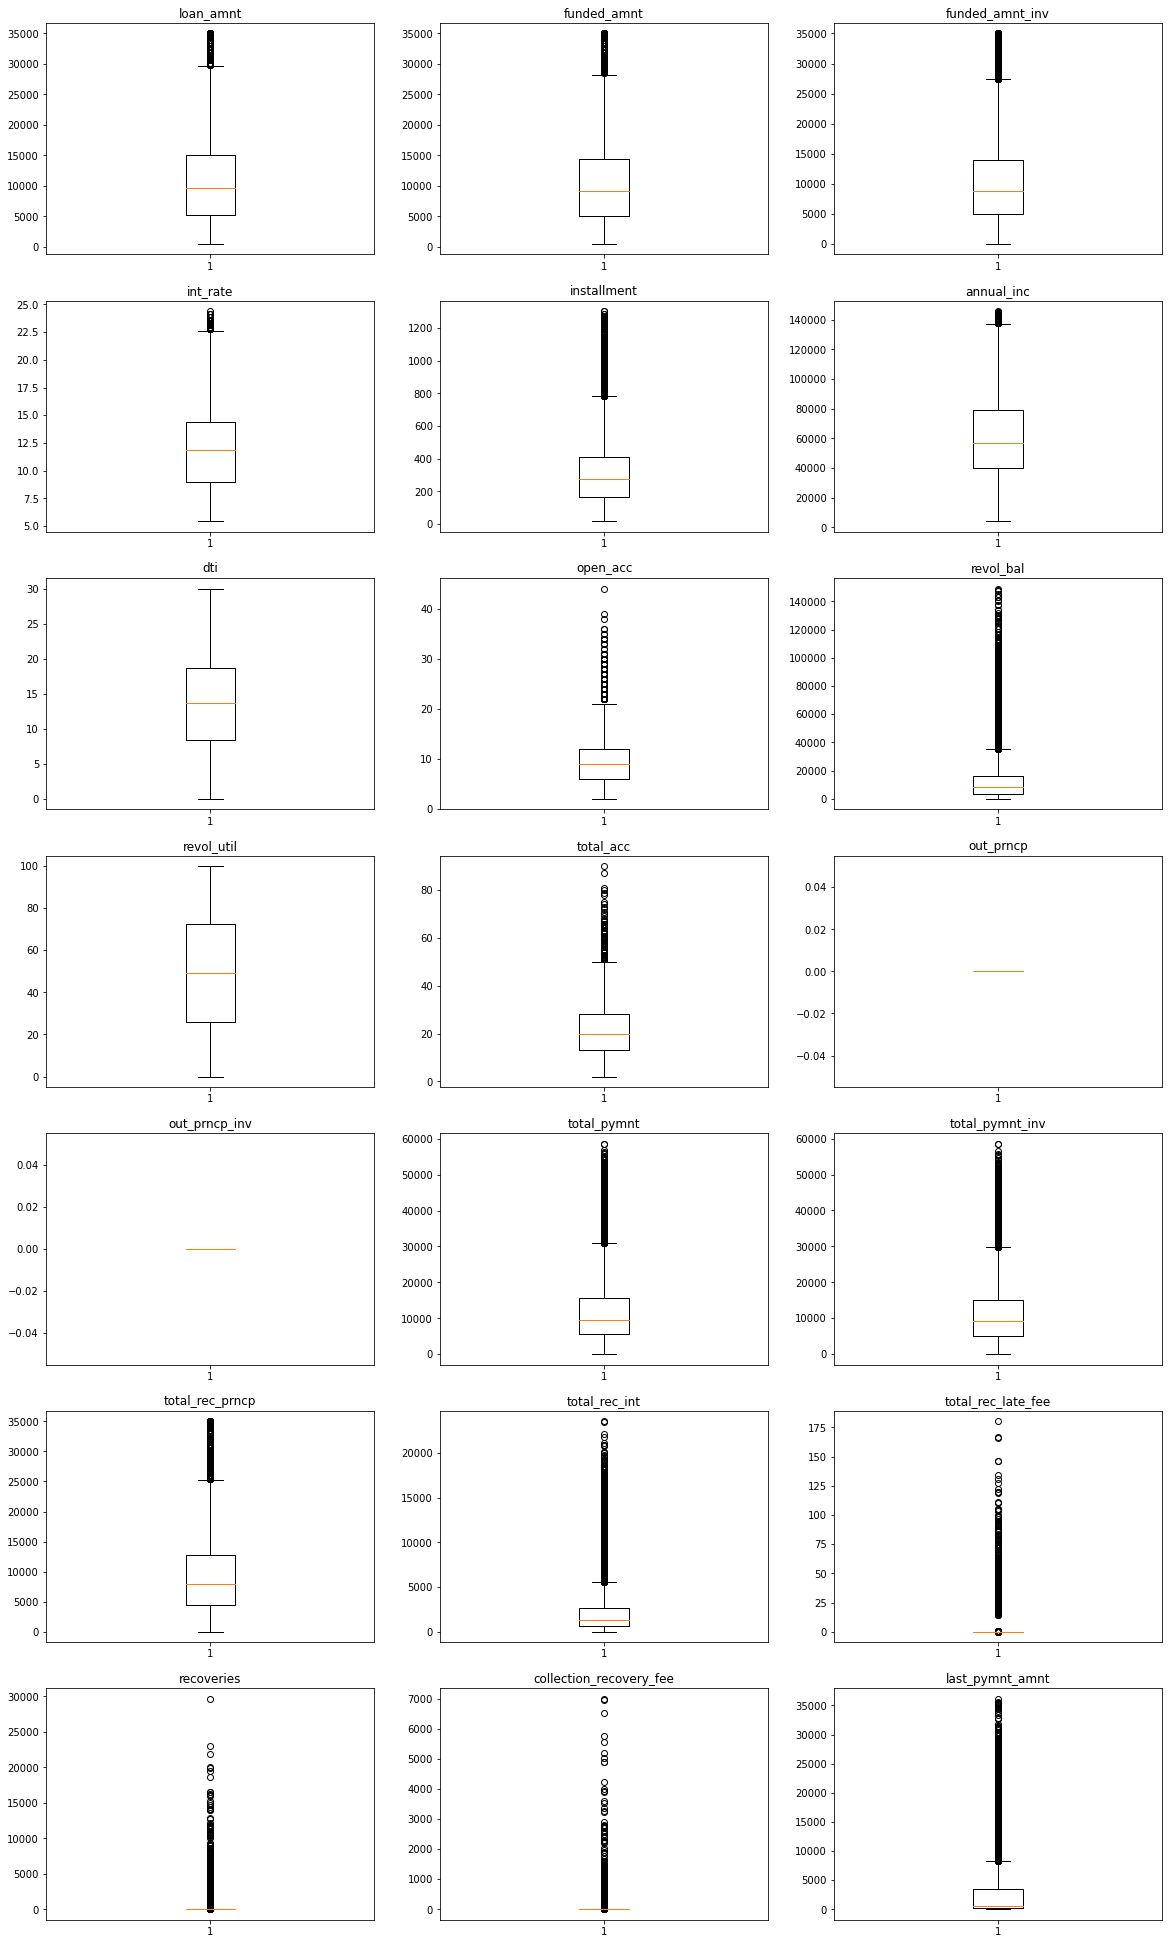

In [33]:
#Visulize the columns and outliers using box plot
plt.figure(figsize = (20,40))
for i in range(0, len(numeric_columns)):
    plt.subplot(8,3,i+1)
    plt.boxplot(loan_clean[numeric_columns[i]])
    plt.title(numeric_columns[i])

In [34]:
#drop these 2 columns because all values are zero 
loan_clean.drop(['out_prncp', 'out_prncp_inv'], inplace=True, axis=1)

/Users/rabia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
#drop these columns since it is more related to recovery which is associated with charged off loans
loan_clean.drop(['total_rec_late_fee', 'recoveries', 'collection_recovery_fee'], inplace=True, axis=1)

## Analysis

In [36]:
#drop these 2 columns from the numeric_columns list
numeric_columns = numeric_columns.drop(['out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'recoveries', 
                                        'collection_recovery_fee'])

In [37]:
#create 2 dataframes, one id for the fully paid loans and the other for the charged off loans
loan_paid = loan_clean.loc[loan_clean['loan_status'] == 'Fully Paid']
loan_charged = loan_clean.loc[loan_clean['loan_status'] == 'Charged Off']

### Loan Status

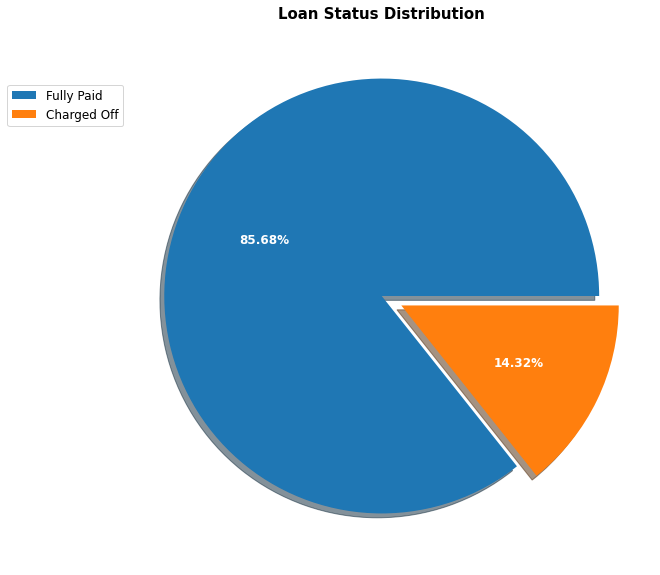

In [38]:
#Plot pie chart for the loans status
plt.figure(figsize=(18,10))

size = loan_clean['loan_status'].value_counts().tolist()
labels = loan_clean.loan_status.value_counts().index
explode = [0, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Loan Status Distribution', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(-0.2,0.9), prop={'size': 12}, loc="upper left")
plt.axis('off')
plt.show()

The majority of the loans in this dataframe is fully paid, approx. 15% of the loans are charged off.
<br> if we plan to build a machine learning model we need to consider dealing with class imbalance before moving forwared.

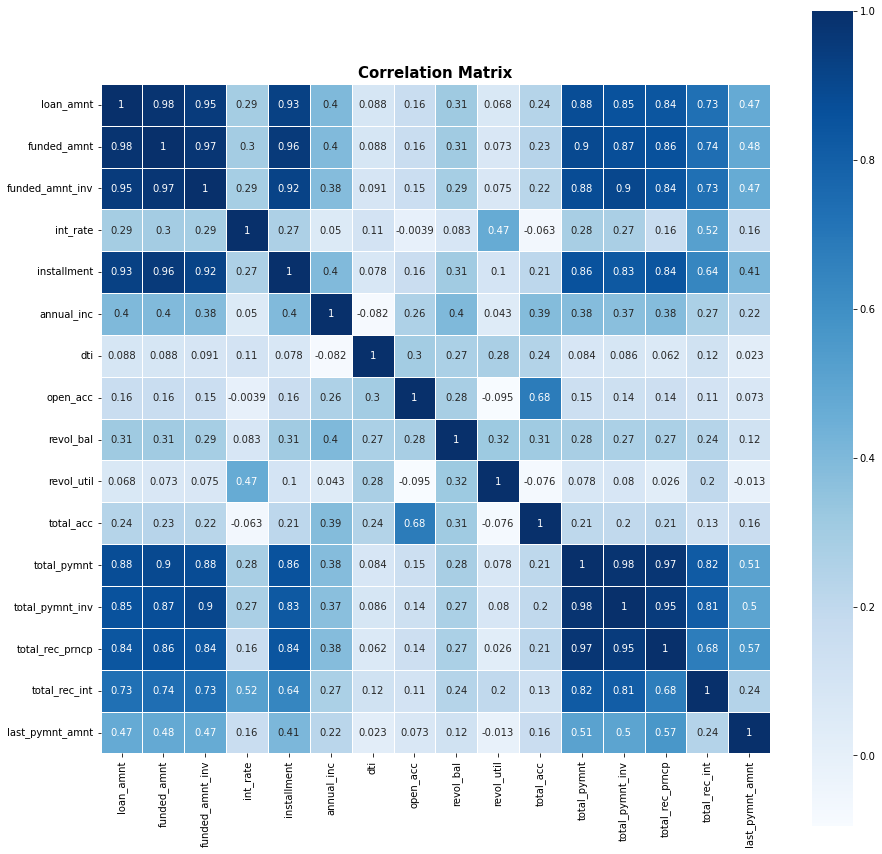

In [39]:
# plot the correlation matrix using heatmap
plt.figure(figsize = (15,15))
sns.heatmap(loan_clean[numeric_columns].corr(), cmap = "Blues", square = True, annot = True, linewidths = 0.5)
plt.title("Correlation Matrix", fontsize = 15, fontweight = 'bold')
plt.show()

Many features in the data are highly correlated with each other. the correlated features are related to the loan amount and payment received, installments also correlated with them too. this is normal since hte payments are decided base on the loan amount and installments is the plan of the monthly payments so it is normal to be high when the loan of the amount is high and vise versa.
<br>
<br> other than that we can see midum correlation between the total accounts and open accounts which should be the case, since big part of the total accounts are open accounts. we can see a high correlation ebtween recoveries and collection recoveries fee which should be the case, you normal pay more fees to third party to collect the debit if the collected amlount is high and vise versa.

In [40]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35023 entries, 0 to 39680
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    35023 non-null  int64         
 1   loan_amnt             35023 non-null  int64         
 2   funded_amnt           35023 non-null  int64         
 3   funded_amnt_inv       35023 non-null  float64       
 4   term                  35023 non-null  object        
 5   int_rate              35023 non-null  float64       
 6   installment           35023 non-null  float64       
 7   grade                 35023 non-null  object        
 8   sub_grade             35023 non-null  object        
 9   emp_length            35023 non-null  object        
 10  home_ownership        35023 non-null  object        
 11  annual_inc            35023 non-null  float64       
 12  verification_status   35023 non-null  object        
 13  issue_d         

The features will be divided into  3 sub groups:
<br>
### **1. Loan Specific Features**
### **2. Borrower Information Features**
### **3. Borrower Loan Histiry Features**

## Loan Specific Features

### Loan Amount/ Funded Amount / Funded Amount Invested
<br>
<br> These 3 features are highly correlated with each other (0.95-1.0) and this is not a surprise since these are highly replated to each other. They are also highly correlated to the total paymnets received (Interest and Principle), and to the monthly installments.

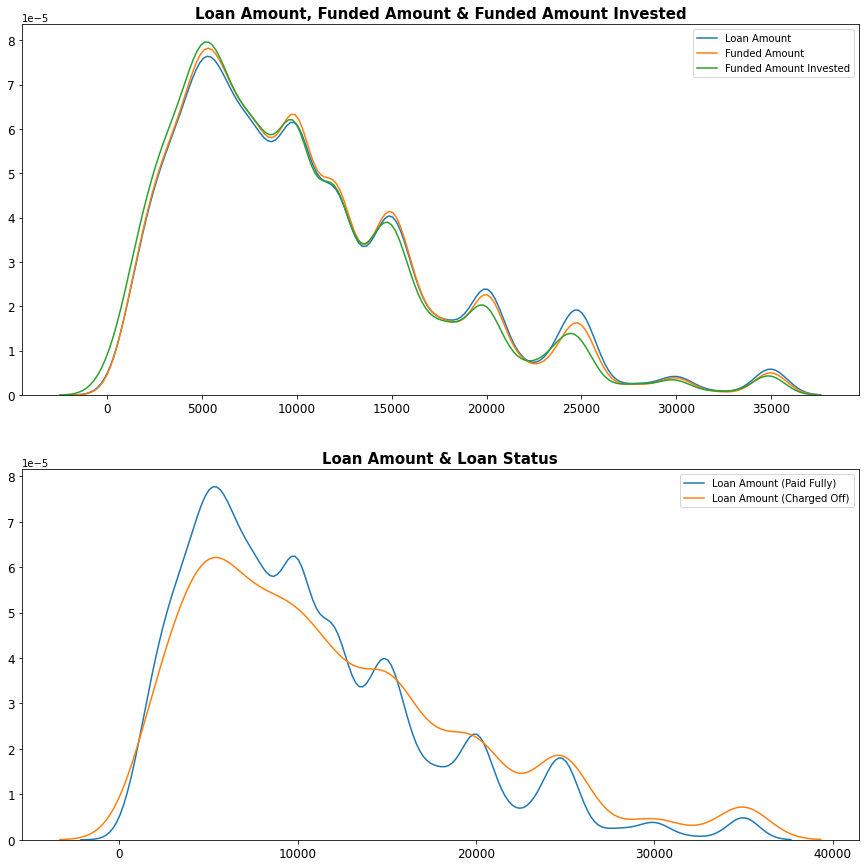

In [41]:
#plot kde plots
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.kdeplot(data = loan_clean, x ='loan_amnt',label = 'Loan Amount').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_clean, x ='funded_amnt',label = 'Funded Amount').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_clean, x ='funded_amnt_inv',label = 'Funded Amount Invested').set(xlabel = None, 
                                                                                          ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Loan Amount, Funded Amount & Funded Amount Invested", fontsize = 15, fontweight = 'bold')
plt.legend(loc = 'upper right')

plt.subplot(2,1,2)
sns.kdeplot(data = loan_paid, x ='loan_amnt',label = 'Loan Amount (Paid Fully)').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_charged, x ='loan_amnt',label = 'Loan Amount (Charged Off)').set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Loan Amount & Loan Status", fontsize = 15, fontweight = 'bold')
plt.legend(loc = 'upper right')
plt.savefig("Loan-amt-loan-status.png")
plt.show()

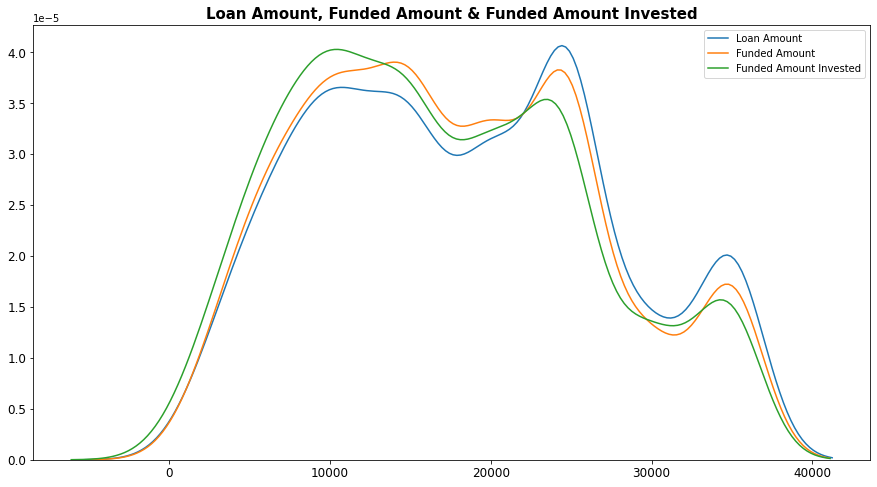

In [42]:
#plot kde plots
plt.figure(figsize=(15,8))
sns.kdeplot(data = loan_high, x ='loan_amnt',label = 'Loan Amount').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_high, x ='funded_amnt',label = 'Funded Amount').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_high, x ='funded_amnt_inv',label = 'Funded Amount Invested').set(xlabel = None, 
                                                                                          ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Loan Amount, Funded Amount & Funded Amount Invested", fontsize = 15, fontweight = 'bold')
plt.legend(loc = 'upper right')
plt.show()

In [43]:
#split the loand amount data into segments for aall the 3 dataframes
loan_clean["loan_amt_grp"] = pd.cut(loan_clean["loan_amnt"], 
                                    range(0, 50000, 15000),labels=["0-15k", "15k-30k", ">45k"])
loan_paid["loan_amt_grp"] = pd.cut(loan_clean["loan_amnt"], 
                                   range(0, 50000, 15000),labels=["0-15k", "15k-30k", ">45k"])
loan_charged["loan_amt_grp"] = pd.cut(loan_clean["loan_amnt"], 
                                      range(0, 50000, 15000),labels=["0-15k", "15k-30k", ">45k"])

/var/folders/z4/qmnvxx9x3pzbm0w1wf_dd8z80000gp/T/ipykernel_44167/1586998652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean["loan_amt_grp"] = pd.cut(loan_clean["loan_amnt"],
/var/folders/z4/qmnvxx9x3pzbm0w1wf_dd8z80000gp/T/ipykernel_44167/1586998652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_paid["loan_amt_grp"] = pd.cut(loan_clean["loan_amnt"],
/var/folders/z4/qmnvxx9x3pzbm0w1wf_dd8z80000gp/T/ipykernel_44167/1586998652.py:6: SettingWithCopyWarning: 
A value is trying to be set 

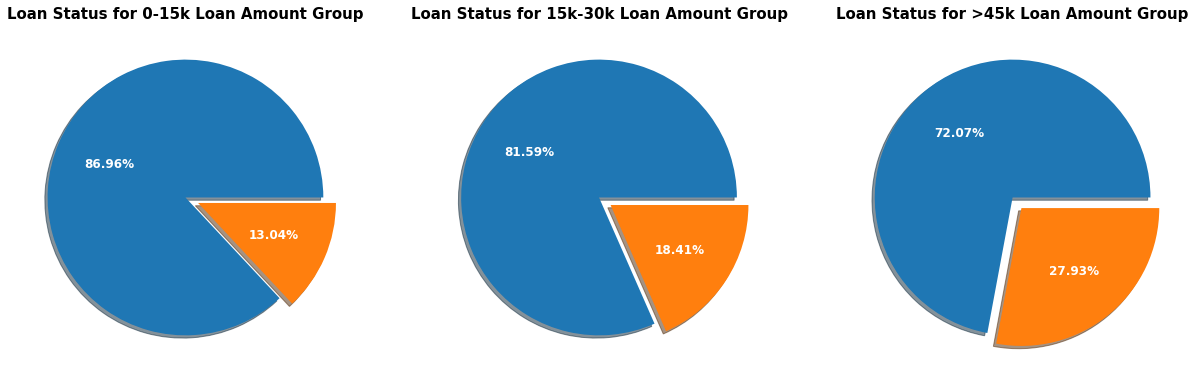

In [44]:
#plot pie chart showing the loand status for each segment of loan amount
plt.figure(figsize=(21,14))
plt.subplot(1,3,1)
size = loan_clean.loc[loan_clean['loan_amt_grp'] == "0-15k"]["loan_status"].value_counts()
labels = loan_clean.loc[loan_clean['loan_amt_grp'] == "0-15k"].loan_status.value_counts().index
explode = [0, 0.1]
colors = {'Fully Paid': 'tab:blue','Charged Off': 'tab:orange'}
plt.pie(size, explode = explode, shadow = True, 
colors=[colors[i] for i in loan_clean.loc[loan_clean['loan_amt_grp'] == "0-15k"].loan_status.value_counts().index],
        autopct = '%.2f%%', textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Loan Status for 0-15k Loan Amount Group', fontsize = 15, fontweight = 'bold')
plt.axis('off')

plt.subplot(1,3,2)
size = loan_clean.loc[loan_clean['loan_amt_grp'] == "15k-30k"]["loan_status"].value_counts()
labels = loan_clean.loc[loan_clean['loan_amt_grp'] == "15k-30k"].loan_status.value_counts().index
explode = [0, 0.1]
colors = {'Fully Paid': 'tab:blue','Charged Off': 'tab:orange'}
plt.pie(size, explode = explode, shadow = True, 
colors=[colors[i] for i in loan_clean.loc[loan_clean['loan_amt_grp'] == "15k-30k"].loan_status.value_counts().index],
        autopct = '%.2f%%', textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Loan Status for 15k-30k Loan Amount Group', fontsize = 15, fontweight = 'bold')
plt.axis('off')

plt.subplot(1,3,3)
size = loan_clean.loc[loan_clean['loan_amt_grp'] == ">45k"]["loan_status"].value_counts()
labels = loan_clean.loc[loan_clean['loan_amt_grp'] == ">45k"].loan_status.value_counts().index
explode = [0, 0.1]
colors = {'Fully Paid': 'tab:blue','Charged Off': 'tab:orange'}
plt.pie(size, explode = explode, shadow = True, 
colors=[colors[i] for i in loan_clean.loc[loan_clean['loan_amt_grp'] == ">45k"].loan_status.value_counts().index],
        autopct = '%.2f%%', textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Loan Status for >45k Loan Amount Group', fontsize = 15, fontweight = 'bold')
plt.axis('off')
plt.show()

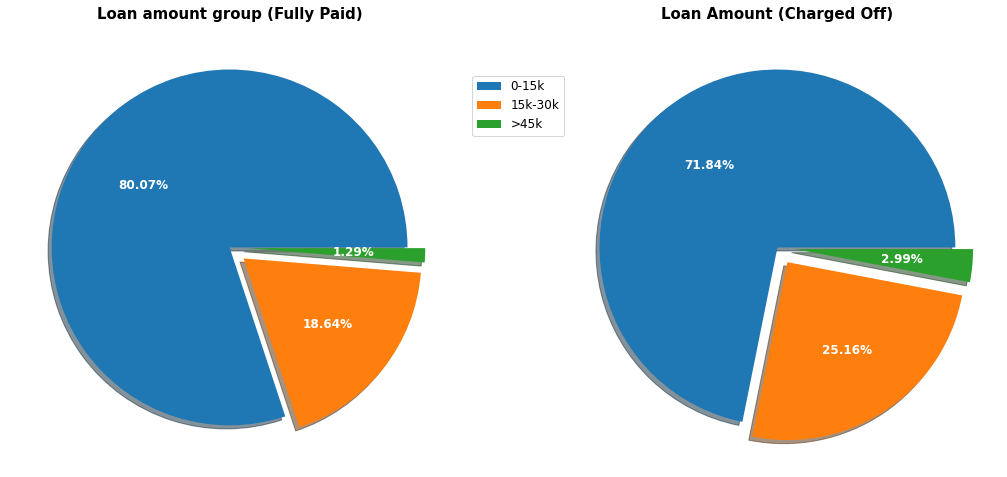

In [45]:
#plot pie chart and count plots for grades and subgrades of the loans
plt.figure(figsize=(18,18))

plt.subplot(2,2,1)
size = loan_paid['loan_amt_grp'].value_counts()
labels = loan_paid.loan_amt_grp.value_counts().index
explode = [0, 0.1, 0.1]
colors = {'0-15k': 'tab:blue','15k-30k': 'tab:orange','>45k': 'tab:green'}
plt.pie(size, explode = explode, shadow = True, 
        colors=[colors[i] for i in loan_clean.loan_amt_grp.value_counts().index], autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Loan amount group (Fully Paid)', fontsize = 15, fontweight = 'bold')
plt.axis('off')

plt.subplot(2,2,2)
size = loan_charged['loan_amt_grp'].value_counts().tolist()
labels = loan_charged.loan_amt_grp.value_counts().index
explode = [0, 0.1, 0.1]
plt.pie(size, explode = explode, shadow = True, 
        colors=[colors[i] for i in loan_clean.loan_amt_grp.value_counts().index], autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Loan Amount (Charged Off)', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(-0.2,0.9), prop={'size': 12}, loc="upper left")
plt.axis('off')

plt.show()

We can notice Large peak around 5000 USD and small peaks which migh be beaause loans usually requested in an interval of 5k's like (5k, 10k, 15 k, etc).
<br>
<br> All these amounts are highly correlated with slight difference, this difference is showing loan amount is less skewed to low values compared to funded and funded invested amounts. This might be due to lenders slightly hesitant to pay the loan amount requested when the amount is large, but in most cases they pay the requested loan amount.
<br>
<br> The same thing can be interperted from the second chart, The loan amount distribution is almost identical between paid loans and charged off loans. It just appear that the loans are more tend to be charged off, and it more likely to be fully paid when the loan amount is smalller.

### Total Payment

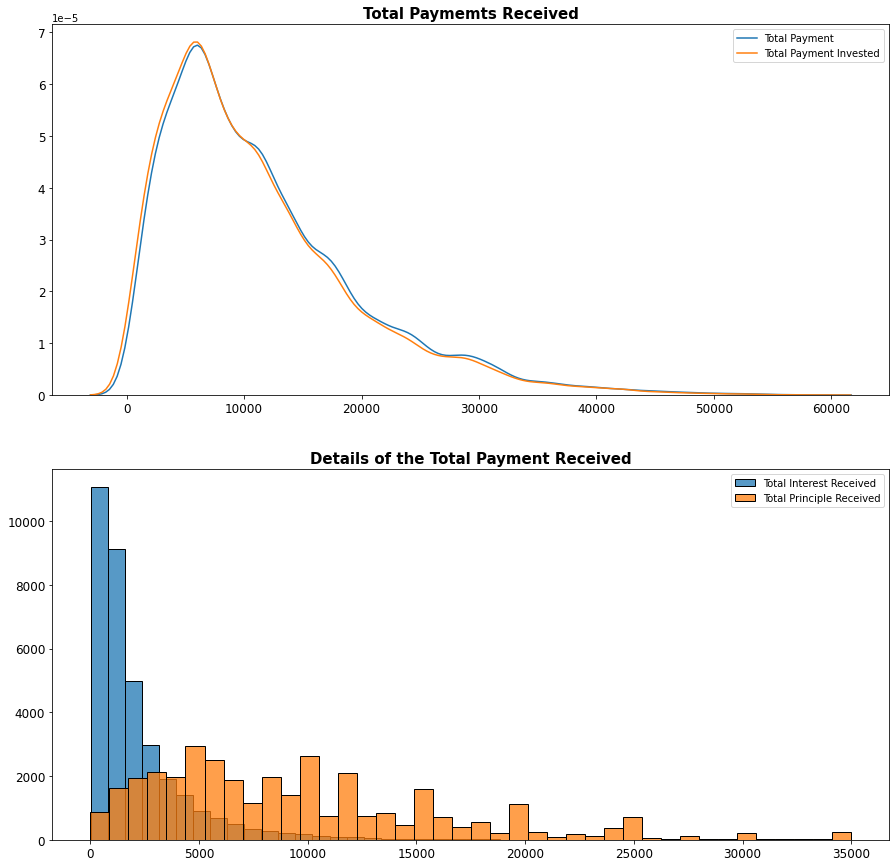

In [46]:
#plot kde plot and hist plot
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.kdeplot(data = loan_clean, x ='total_pymnt',label = 'Total Payment').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_clean, x ='total_pymnt_inv',label = 'Total Payment Invested').set(xlabel = None, 
                                                                                          ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Total Paymemts Received", fontsize = 15, fontweight = 'bold')
plt.legend(loc = 'upper right')

plt.subplot(2,1,2)
sns.histplot(data = loan_clean, x ='total_rec_int',label = 'Total Interest Received', 
             color = "tab:blue", bins = 30).set(xlabel = None, ylabel = None)
sns.histplot(data = loan_clean, x ='total_rec_prncp',label = 'Total Principle Received', 
             color = "tab:orange", bins = 40).set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Details of the Total Payment Received", fontsize = 15, fontweight = 'bold')
plt.legend(loc = 'upper right')
plt.show()

Total payments received is matching the ditribution o the loan amount and it is more skewed to the low values. The difference between Total Payment and Total Payment Invested is very small which means that the portion of the amlunt invested by the investors represent most of the total amount.
<br>
<br> By checking the details of the total payment received. Most of it is covering the principle and small portion covers the interest which is normal. total principle received is follwing the distribution of the the total payment and loan amount.

### Installment

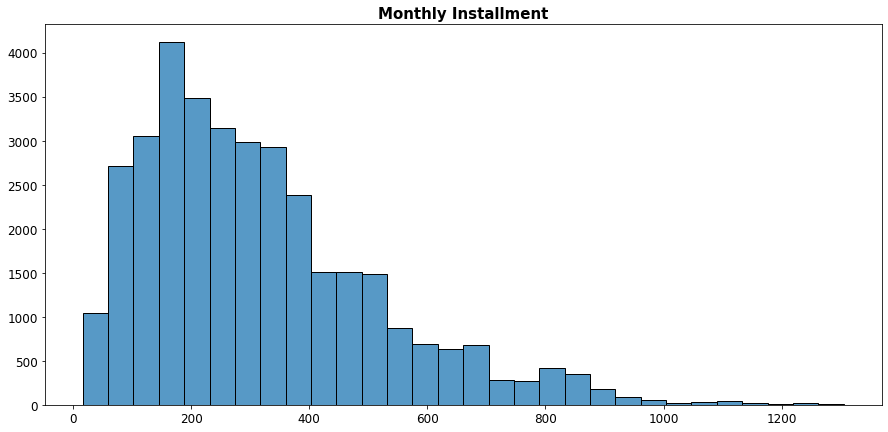

In [47]:
#hist plot for the Monthly Installments
plt.figure(figsize=(15,7))
sns.histplot(data=loan_clean, x="installment", bins=30).set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Monthly Installment", fontsize = 15, fontweight = 'bold')
plt.show()

Monthly Installments are also more skewed to low values since it is related to the loan amount.(as the loan amount increases, the amount of the installment increases)

### Term

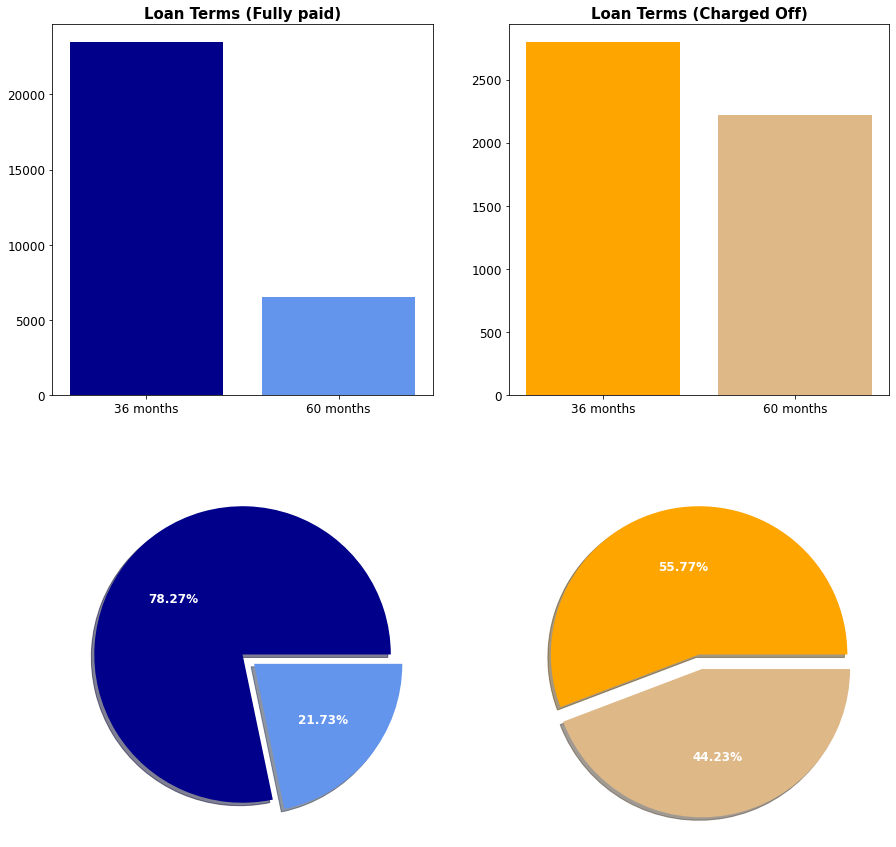

In [48]:
#plot bar Chart and Pie chart to explore the different loan terms data
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.bar(loan_paid.groupby("term")["term"].count().index, 
        loan_paid.groupby("term")["term"].count(), 
        color=["darkblue", "cornflowerblue"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Loan Terms (Fully paid)", fontsize = 15, fontweight = 'bold')

plt.subplot(2,2,2)
plt.bar(loan_charged.groupby("term")["term"].count().index, 
        loan_charged.groupby("term")["term"].count(), 
        color=["orange", "burlywood"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Loan Terms (Charged Off)", fontsize = 15, fontweight = 'bold')

plt.subplot(2,2,3)
size = loan_paid['term'].value_counts().tolist()
colors = ["darkblue", "cornflowerblue"]
labels = ["36 Months', '60 Months"]
explode = [0, 0.1]
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.axis('off')

plt.subplot(2,2,4)
size = loan_charged['term'].value_counts().tolist()
colors = ["orange", "burlywood"]
labels = ["36 Months', '60 Months"]
explode = [0, 0.1]
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.show()

In [49]:
#Calculate the percentage of charged off loans with 60 months terms to the overall 60 months term loans
100*len(loan_charged.loc[loan_charged['term'] == '60 months'])/len(loan_clean.loc[loan_clean['term'] == '60 months'])

25.383382925154496

In [50]:
#Calculate the percentage of charged off loans with 60 months terms to the overall 60 months term loans
100*len(loan_charged.loc[loan_charged['term'] == '36 months'])/len(loan_clean.loc[loan_clean['term'] == '36 months'])

10.641050028533384

Overall, most of the loan terms are from 36 months, but charged off loans have a larger proportion of 60 months loand coompare to fully paid loans. almost 45% of the charged off loans is with a 60 months term which means that despite the longer duration of the loans it still can be charged off.
<br>
<br>We can see that loans with 60 months term are more likely to be charged off compare to loans with 36 months terms. 1 out of 4 loans with 60 months term resulted in charged off loan while only 1 out of 10 loand with 36 month term resulted in charged off loan.

### Interest Rate

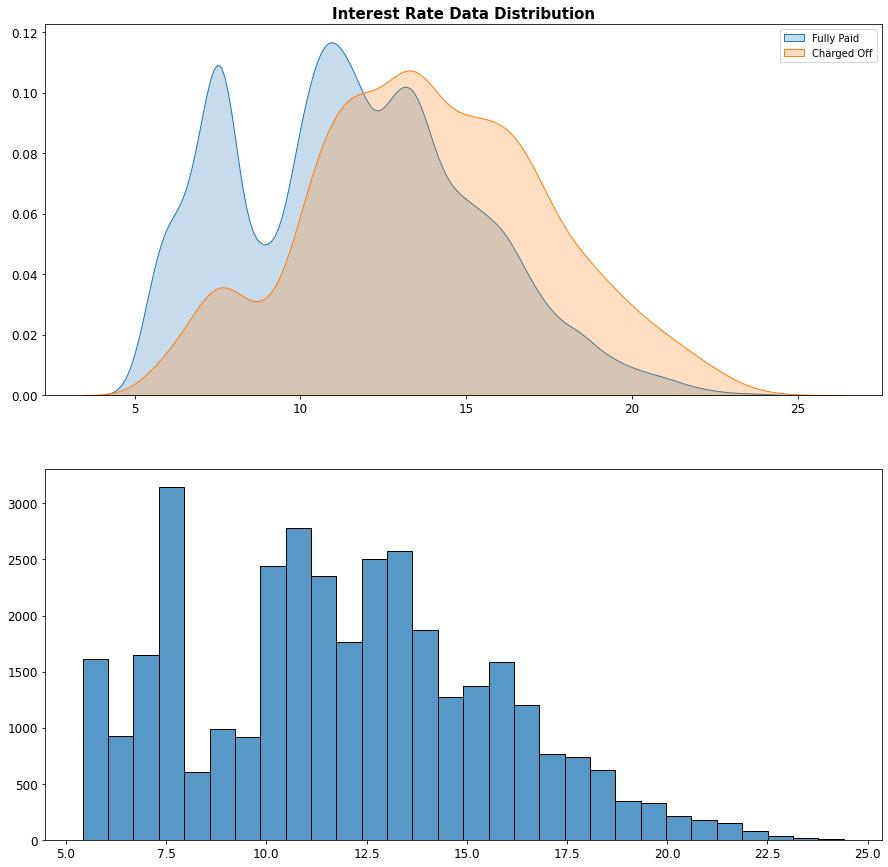

In [51]:
#plot kde plot for the interest rate for fully paid and charged off loans
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.kdeplot(data = loan_paid, x ='int_rate', fill = bool, label = "Fully Paid").set(xlabel = None, 
                                                                                             ylabel = None)
sns.kdeplot(data = loan_charged, x ='int_rate', fill = bool, label = "Charged Off").set(xlabel = None, 
                                                                                        ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Interest Rate Data Distribution", fontsize = 15, fontweight = 'bold')
plt.legend(loc='upper right')

#plot the hist plot for the interest rate
plt.subplot(2,1,2)
sns.histplot(data=loan_clean, x="int_rate", bins=30).set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

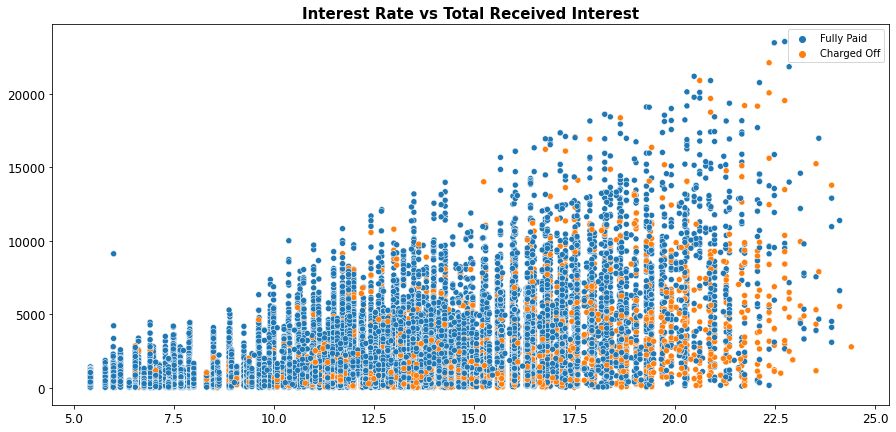

In [52]:
#plot scatter plot for the interest rate for fully paid and charged off loans
plt.figure(figsize=(15,7))
sns.scatterplot(data = loan_clean, x ='int_rate', y = 'total_rec_int', hue = "loan_status").set(xlabel = None, 
                                                                                             ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Interest Rate vs Total Received Interest", fontsize = 15, fontweight = 'bold')
plt.legend(loc='upper right')
plt.show()

We can notice the following from the charts:
<br>
<br>1. There is peak around 7.5% interest loan but a huge drop between 7.5% and 10% which shows fewer portion of loand with interest rate between 7.5% and 10%.
<br>2. Charged off loans has a relatively higher interest rate compare to fully paid loans.
<br>3. As the interest rate gets higher as the total interste received increases which is normal. As we can see the charged off loans are more tend to have higehr interest rate with liss amount of received interest compare to fully paid loans

### Loan Grade & Sub Grade

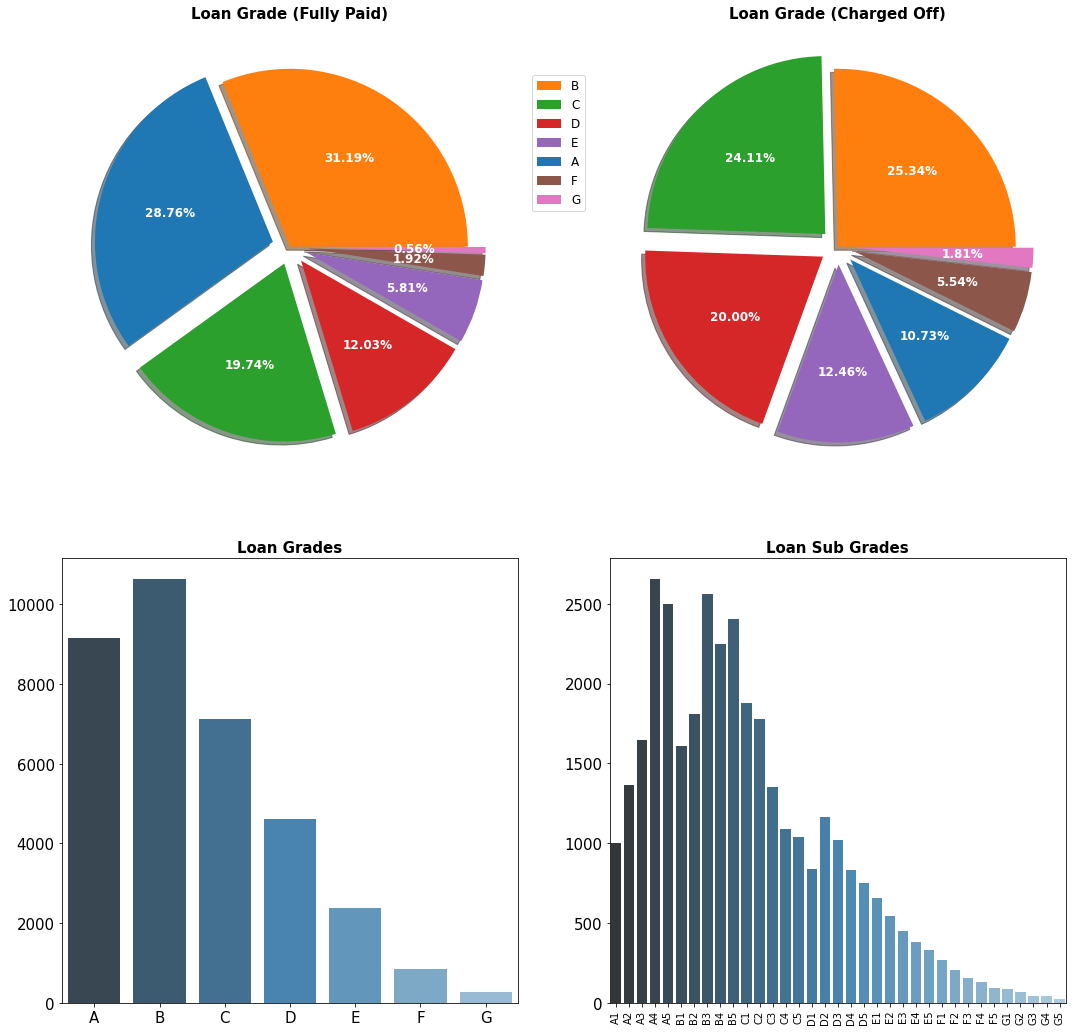

In [53]:
#plot pie chart and count plots for grades and subgrades of the loans
plt.figure(figsize=(18,18))

plt.subplot(2,2,1)
size = loan_paid['grade'].value_counts()
labels = loan_paid.grade.value_counts().index
explode = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
colors = {'A': 'tab:blue','B': 'tab:orange','C': 'tab:green','D': 'tab:red','E': 'tab:purple','F': 'tab:brown', 
          'G': 'tab:pink'}
plt.pie(size, explode = explode, shadow = True, 
        colors=[colors[i] for i in loan_paid.grade.value_counts().index], autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Loan Grade (Fully Paid)', fontsize = 15, fontweight = 'bold')
plt.axis('off')

plt.subplot(2,2,2)
size = loan_charged['grade'].value_counts().tolist()
labels = loan_charged.grade.value_counts().index
explode = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(size, explode = explode, shadow = True, 
        colors=[colors[i] for i in loan_charged.grade.value_counts().index], autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Loan Grade (Charged Off)', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(-0.2,0.9), prop={'size': 12}, loc="upper left")
plt.axis('off')

plt.subplot(2,2,3)
palette = sns.color_palette("Blues_d", n_colors=7)
palette.reverse()
sns.countplot(x = 'grade', data = loan_clean, palette = palette, 
              order = sorted(loan_clean.grade.value_counts().index)).set(xlabel = None, ylabel = None)
plt.title('Loan Grades', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)
palette = sns.color_palette("Blues_d", n_colors=35)
palette.reverse()
sns.countplot(x = 'sub_grade', data = loan_clean, palette = palette, 
              order = sorted(loan_clean.sub_grade.value_counts().index)).set(xlabel = None, ylabel = None)
plt.title('Loan Sub Grades', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 15)
plt.show()

We can notice that a higher portion of loans A and B are represented in fully paid loans (60%) comoare to only (35%) for the charged off loans, for all other loan grades we can see the  thier proportion to the total is less than the fully paid loans. It looks like loan grade classification is a good indication of rather a loan is likely to be charged off or not.
<br>
<br> We can see a drop in the number of loans with a subgrade of B1 and B2 compare to A5 and A3. This can explain the drop in interest rate between 7.5% adn 10% we noticed earlier. looks like for loan grades A and B it is more likely it will be clasifed in the lower boundry of the subgrade rather than dropping to the next grade. it looks like some loans where classified A and B rather than B and C to lower the interest rate on the borrower and make business with him.We do not see this pattern with the other grades.

### Purpose

In [54]:
#create a list of purpose values
count = loan_clean.purpose.value_counts()
count.index.tolist()

['debt_consolidation',
 'credit_card',
 'other',
 'home_improvement',
 'major_purchase',
 'small_business',
 'car',
 'wedding',
 'medical',
 'moving',
 'vacation',
 'house',
 'educational',
 'renewable_energy']

In [55]:
# Pick the top 7 values
top7 = count[:7].index
top7

Index(['debt_consolidation', 'credit_card', 'other', 'home_improvement',
       'major_purchase', 'small_business', 'car'],
      dtype='object')

In [56]:
# replace all the other values with 'other'
loan_clean.purpose = loan_clean.purpose.where(loan_clean.purpose.isin(top7), 'other')
loan_paid.purpose = loan_paid.purpose.where(loan_paid.purpose.isin(top7), 'other')
loan_charged.purpose = loan_charged.purpose.where(loan_charged.purpose.isin(top7), 'other')

/Users/rabia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


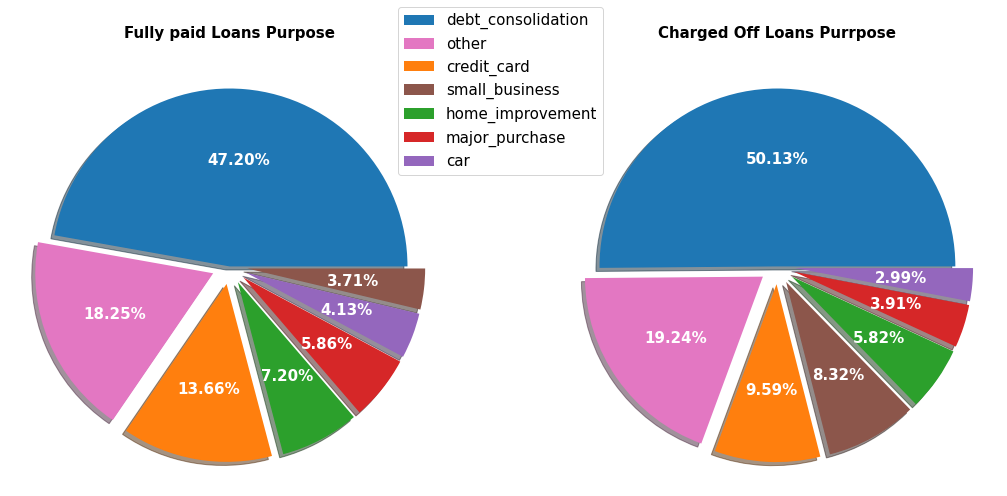

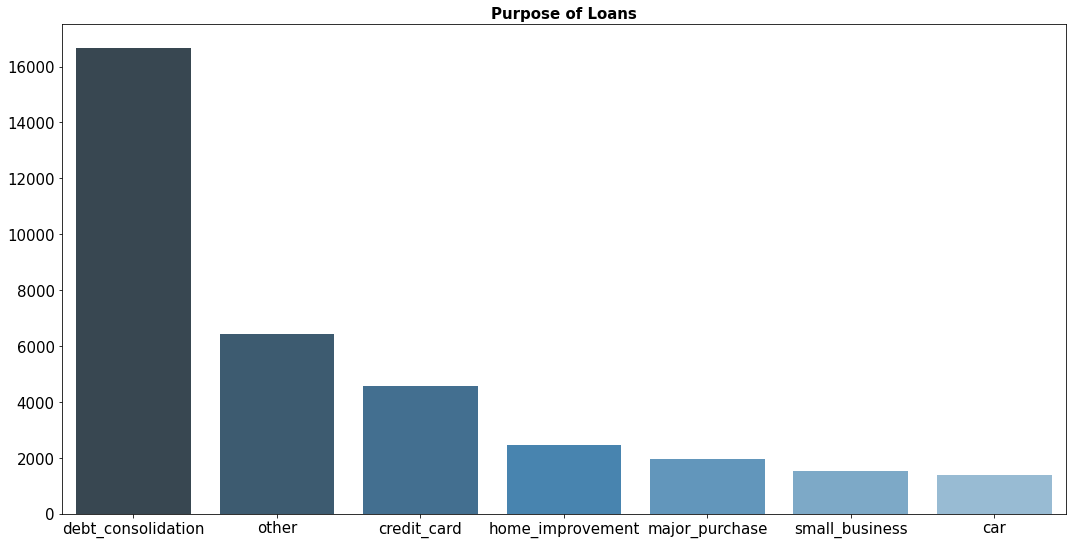

In [57]:
#Plot pie chart for the loan purpose for each loan status and a count plot for for the loan purpose overall
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
size = loan_paid['purpose'].value_counts().tolist()
labels = loan_paid.purpose.value_counts().index
explode = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
colors = {'debt_consolidation': 'tab:blue','credit_card': 'tab:orange','home_improvement': 'tab:green',
          'major_purchase': 'tab:red','car': 'tab:purple','small_business': 'tab:brown', 'other': 'tab:pink'}
plt.pie(size, explode = explode, shadow = True, 
        colors=[colors[i] for i in loan_paid.purpose.value_counts().index], autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.title('Fully paid Loans Purpose', fontsize = 15, fontweight = 'bold')
plt.axis('off')

plt.subplot(2,2,2)
size = loan_charged['purpose'].value_counts().tolist()
labels = loan_charged.purpose.value_counts().index
explode = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
colors = {'debt_consolidation': 'tab:blue','credit_card': 'tab:orange','home_improvement': 'tab:green',
          'major_purchase': 'tab:red','car': 'tab:purple','small_business': 'tab:brown', 'other': 'tab:pink'}
plt.pie(size, explode = explode, shadow = True, 
        colors=[colors[i] for i in loan_charged.purpose.value_counts().index], autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.title('Charged Off Loans Purrpose', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(-0.37,1.1), prop={'size': 15}, loc="upper left")
plt.axis('off')

plt.subplot(2,2,2)
plt.figure(figsize=(18,9))
palette = sns.color_palette("Blues_d", n_colors=7)
palette.reverse()
sns.countplot(x = 'purpose', data = loan_clean, palette = palette, 
              order = loan_clean.purpose.value_counts().index).set(xlabel = None, ylabel = None)
plt.title('Purpose of Loans', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [58]:
#Calculate the percentage of charged off loans for the purpose of 'small business' to the overall small business loans
100*len(loan_charged.loc[loan_charged['purpose'] == 'small_business'])/len(loan_clean.loc[loan_clean['purpose'] == 'small_business'])

27.272727272727273

In [59]:
#Calculate the percentage of charged off loans for the purpose of 'credit card' to the overall credit card loans
100*len(loan_charged.loc[loan_charged['purpose'] == 'credit_card'])/len(loan_clean.loc[loan_clean['purpose'] == 'credit_card'])

10.502183406113538

Almost 50% of the loans are for Debit Consilidation purpose, thr proportion of debit consolidation loans to total loans for charged off loans is higher compare to fully paid loans.
<br>
<br> Looks like the fully paid loans are more for consumable purposes like paying off credit cards, home imporvement, major purchases and cars and we can see the proportion of these purposes is higher in fully paid loan compare to charged off loans. We can see that only (10.5%) of credit card loans is charged off compare to overall (15%) overall charged loans
<br>
<br> In the other hand we see a relatively high proportion of charged off loans which is for small business. as you can see almost 1 out of 4 small business loans has charged off which is higher than the overall percentage of charged off loans of (15%)

## Borrower Information Features

### Employment Lenght

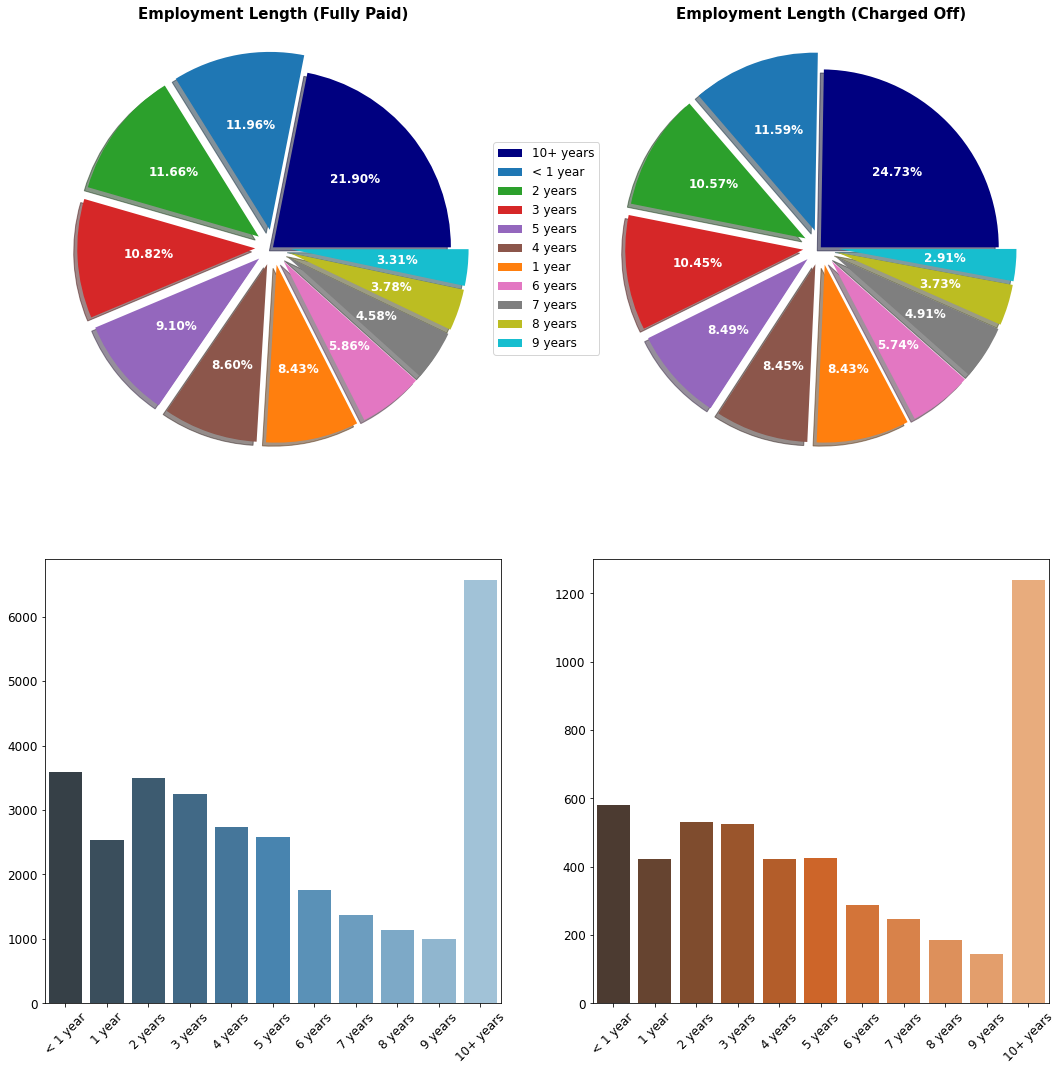

In [60]:
#plot the employment length of the borrower for each loan status in pie chart and count plot formats
plt.figure(figsize=(18,18))

plt.subplot(2,2,1)
size = loan_paid['emp_length'].value_counts().tolist()
labels = loan_paid.emp_length.value_counts().index
explode = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
colors = {'< 1 year': 'tab:blue','1 year': 'tab:orange','2 years': 'tab:green','3 years': 'tab:red',
          '4 years': 'tab:purple','5 years': 'tab:brown', '6 years': 'tab:pink','7 years': 'tab:gray',
          '8 years': 'tab:olive','9 years': 'tab:cyan', '10+ years': 'navy'}
plt.pie(size, explode = explode, shadow = True, 
        colors=[colors[i] for i in loan_clean.emp_length.value_counts().index], autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Employment Length (Fully Paid)', fontsize = 15, fontweight = 'bold')
plt.axis('off')

plt.subplot(2,2,2)
size = loan_charged['emp_length'].value_counts().tolist()
labels = loan_charged.emp_length.value_counts().index
explode = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
colors = {'< 1 year': 'tab:blue','1 year': 'tab:orange','2 years': 'tab:green','3 years': 'tab:red',
          '4 years': 'tab:purple','5 years': 'tab:brown', '6 years': 'tab:pink','7 years': 'tab:gray',
          '8 years': 'tab:olive','9 years': 'tab:cyan', '10+ years': 'navy'}
plt.pie(size, explode = explode, shadow = True, 
        colors=[colors[i] for i in loan_clean.emp_length.value_counts().index], autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Employment Length (Charged Off)', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(-0.25,0.75), prop={'size': 12}, loc="upper left")
plt.axis('off')

plt.subplot(2,2,3)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', 
         '9 years', '10+ years']

palette = sns.color_palette("Blues_d", n_colors=11)
palette.reverse()
sns.countplot(x = 'emp_length', data = loan_paid, order = order, palette = palette).set(xlabel = None, ylabel = None)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)

plt.subplot(2,2,4)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', 
         '9 years', '10+ years']

palette = sns.color_palette("Oranges_d", n_colors=11)
palette.reverse()
sns.countplot(x = 'emp_length', data = loan_charged, order = order, palette = palette).set(xlabel = None, ylabel = None)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.show()

Nothing interesting here. The only thing we noticed that (~50%) of the brrowers has an employment length of 5 years or less, and charged off loans has a proportion of borrowers with long employment length compare to fully paid loans.

### Home Ownership

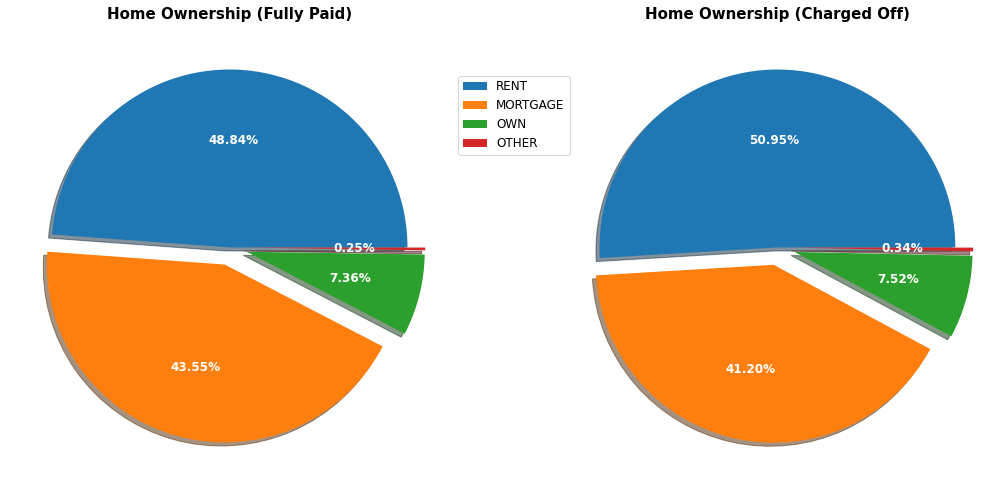

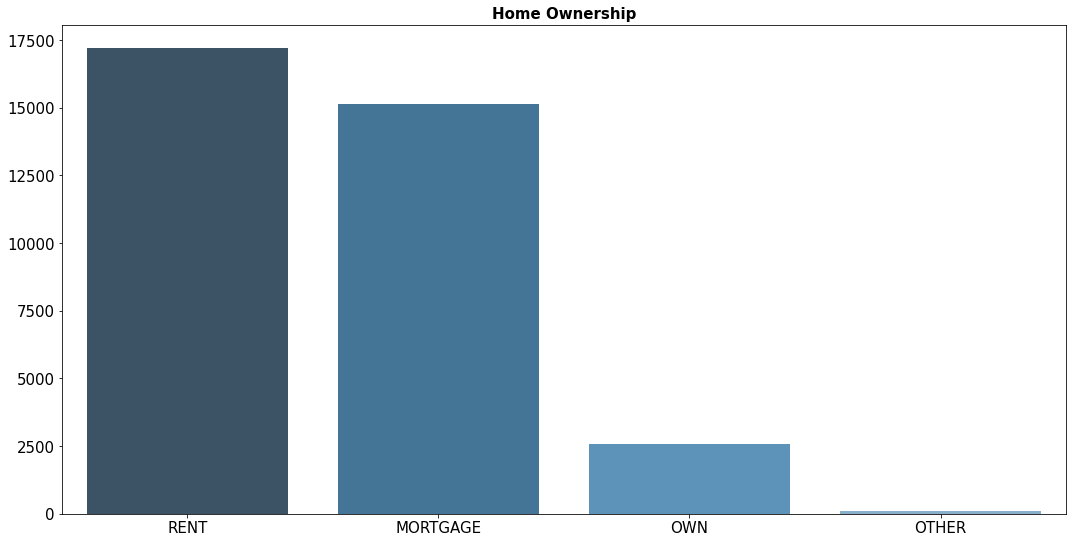

In [61]:
#plot the home ownership status of the borrower for each loan status in pie chart and can overall count plot
plt.figure(figsize=(18,18))

plt.subplot(2,2,1)
size = loan_paid['home_ownership'].value_counts().tolist()
labels = loan_paid.home_ownership.value_counts().index
explode = [0, 0.1, 0.1, 0.1]
colors = {'RENT': 'tab:blue','MORTGAGE': 'tab:orange','OWN': 'tab:green','OTHER': 'tab:red'}
plt.pie(size, explode = explode, shadow = True, 
        colors=[colors[i] for i in loan_paid.home_ownership.value_counts().index], autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Home Ownership (Fully Paid)', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(1.0,0.9), prop={'size': 12}, loc="upper left")
plt.axis('off')

plt.subplot(2,2,2)
size = loan_charged['home_ownership'].value_counts().tolist()
labels = loan_charged.home_ownership.value_counts().index
explode = [0, 0.1, 0.1, 0.1]
plt.pie(size, explode = explode, shadow = True, 
        colors=[colors[i] for i in loan_charged.home_ownership.value_counts().index], autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Home Ownership (Charged Off)', fontsize = 15, fontweight = 'bold')
plt.axis('off')

plt.subplot(2,2,2)
plt.figure(figsize=(18,9))
palette = sns.color_palette("Blues_d", n_colors=4)
palette.reverse()
sns.countplot(x = 'home_ownership', data = loan_clean, palette = palette, 
              order = loan_clean.home_ownership.value_counts().index).set(xlabel = None, ylabel = None)
plt.title('Home Ownership', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()


We can see the borrowers are divided equally between Renters and brrowrs who bought a house through mortage or fully owned it. It looks like home ownerhsip has nothing to do with loans being charged off or fully paid. Yes, we can see the proportion of renters is slightly higher for browers whose loand are charged off but it does not look significantly different 

### Annual Income

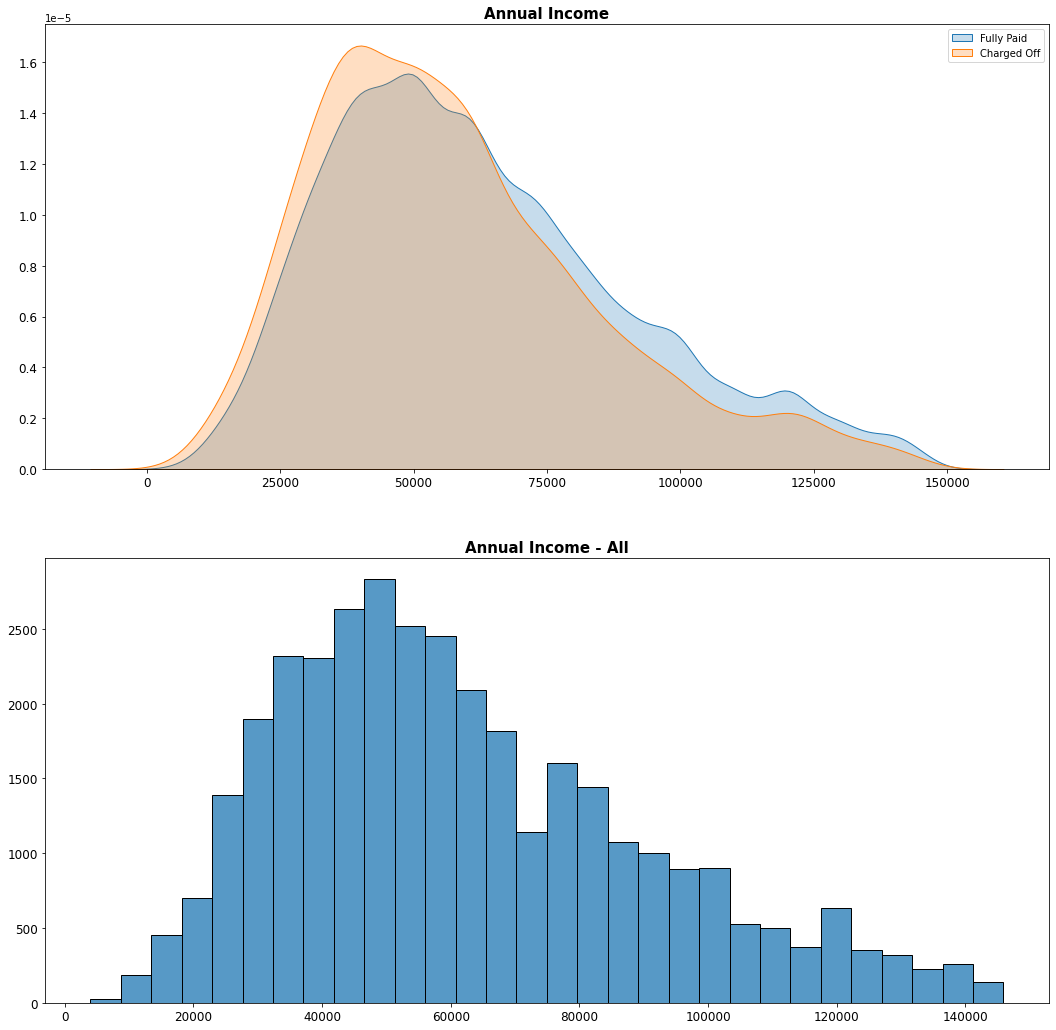

In [62]:
#Plot annual income data distribution in kde and histogram plots
plt.figure(figsize=(18,18))
plt.subplot(2,1,1)
sns.kdeplot(data = loan_paid, x ='annual_inc', fill = bool, label = 'Fully Paid').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_charged, x ='annual_inc', fill = bool, label = "Charged Off").set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Annual Income", fontsize = 15, fontweight = 'bold')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
sns.histplot(data = loan_clean, x ='annual_inc', fill = bool, bins = 30).set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Annual Income - All", fontsize = 15, fontweight = 'bold')
plt.show()

Annual Income of browers whose loan is charged off is less than the annual income of the borowers whose loan is fully paid. This indicate the importance of brower income in the propability of rather the loan will be charged off or not.

### Verification Status

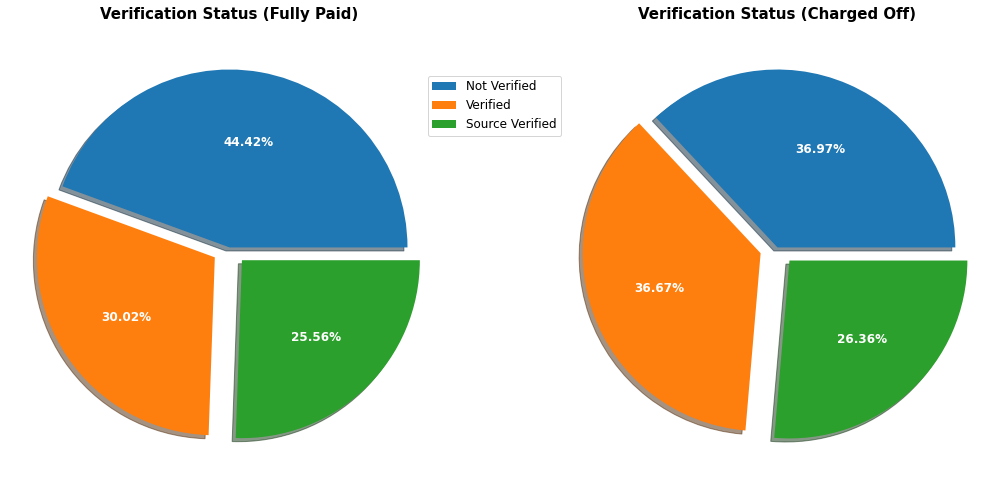

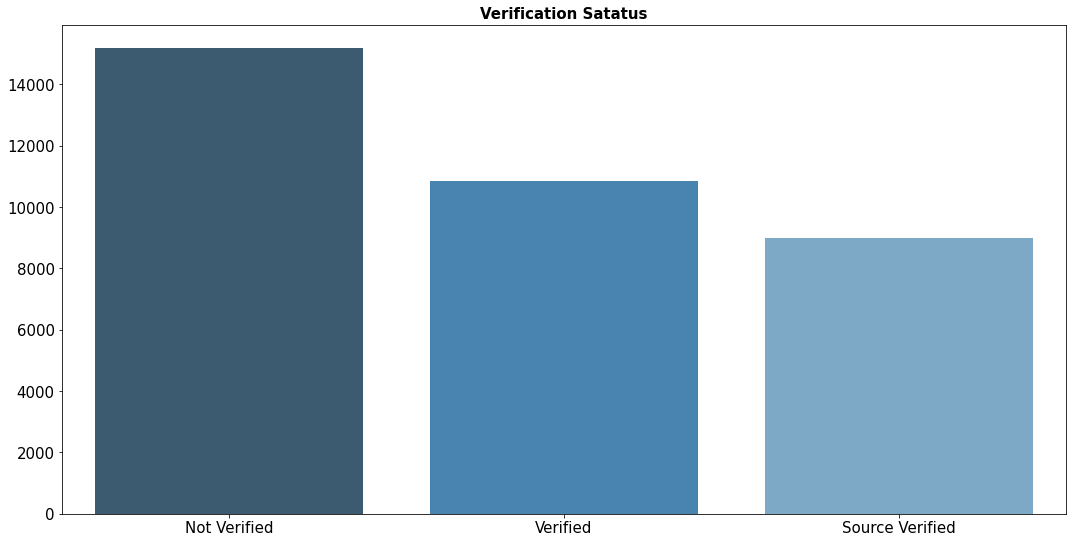

In [63]:
#plot the income verification status status of the borrower for each loan status in pie chart and can overall count plot
plt.figure(figsize=(18,18))

plt.subplot(2,2,1)
size = loan_paid['verification_status'].value_counts().tolist()
labels = loan_paid.verification_status.value_counts().index
explode = [0, 0.1, 0.1]
colors = {'Not Verified': 'tab:blue','Verified': 'tab:orange','Source Verified': 'tab:green'}
plt.pie(size, explode = explode, shadow = True, 
        colors=[colors[i] for i in loan_paid.verification_status.value_counts().index], autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Verification Status (Fully Paid)', fontsize = 15, fontweight = 'bold')

plt.axis('off')

plt.subplot(2,2,2)
size = loan_charged['verification_status'].value_counts().tolist()
labels = loan_charged.verification_status.value_counts().index
explode = [0, 0.1, 0.1]
colors = {'Not Verified': 'tab:blue','Verified': 'tab:orange','Source Verified': 'tab:green'}
plt.pie(size, explode = explode, shadow = True, 
        colors=[colors[i] for i in loan_charged.verification_status.value_counts().index], autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Verification Status (Charged Off)', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(-0.3,0.9), prop={'size': 12}, loc="upper left")
plt.axis('off')

plt.subplot(2,2,2)
plt.figure(figsize=(18,9))
palette = sns.color_palette("Blues_d", n_colors=3)
palette.reverse()
sns.countplot(x = 'verification_status', data = loan_clean, palette = palette, 
              order = loan_clean.verification_status.value_counts().index).set(xlabel = None, ylabel = None)
plt.title('Verification Satatus', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

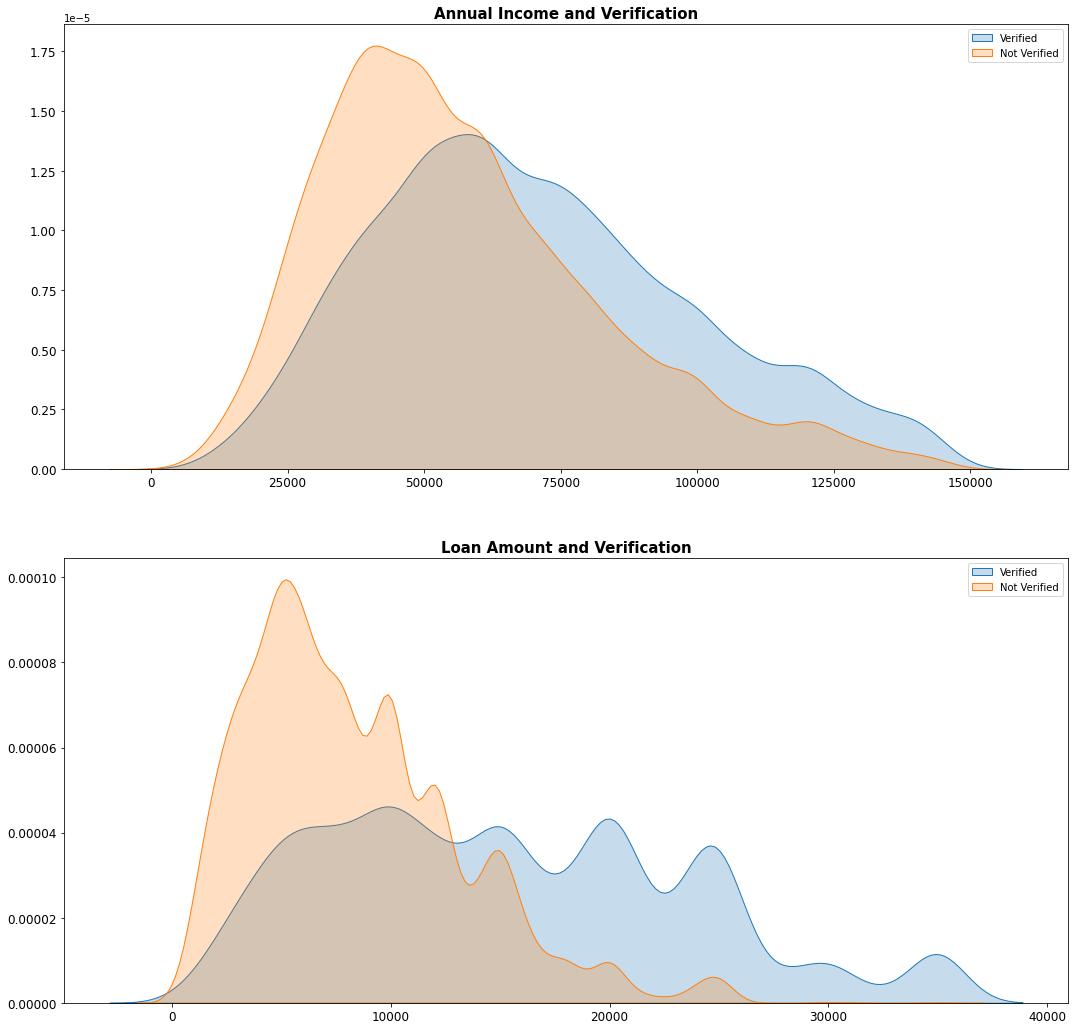

In [64]:
# Plot 2 kde plots to check how the annual income and loan amount change base on verification status
plt.figure(figsize=(18,18))
plt.subplot(2,1,1)
sns.kdeplot(data = loan_clean.loc[loan_clean['verification_status'] == 'Verified'], x ='annual_inc', 
            fill = bool, label = 'Verified').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_clean.loc[loan_clean['verification_status'] == 'Not Verified'], x ='annual_inc', 
            fill = bool, label = 'Not Verified').set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Annual Income and Verification", fontsize = 15, fontweight = 'bold')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
sns.kdeplot(data = loan_clean.loc[loan_clean['verification_status'] == 'Verified'], x ='loan_amnt', 
            fill = bool, label = 'Verified').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_clean.loc[loan_clean['verification_status'] == 'Not Verified'], x ='loan_amnt', 
            fill = bool, label = 'Not Verified').set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Loan Amount and Verification", fontsize = 15, fontweight = 'bold')
plt.legend(loc='upper right')
plt.show()

In [65]:
#Calculate the percentage of charged off loans for the purpose of 'small business' to the overall small business loans
100*len(loan_charged.loc[loan_charged['verification_status'] == 'Verified'])/len(loan_clean.loc[loan_clean['verification_status'] == 'Verified'])

16.952433628318584

Approximately 40% of the time the income of the brower is not verfied and approximately third of the applicants for the loans neither thier income nor the source of the income is verfied.
<br>
<br> Looks like verification of the income does not improve the probability of the loan result in being fully paid. Actuallly, it looks the opposite. (17%) of the Loan whose applicant income has been verified were charged off and it is more than the overal charged off proportion (15%). 
<br>
<br> We can see in the last Kde plots, that lenders are more likely to verify the annual income of the applicant if he reported a higher annual income, but we have seen that browers with high annual income are more likely to fully pay the loan. Also, we can see that the higher the loan amount the most probable the loan be verified. This could be due to the fact that high income browers are more like to request a high loan amount but overall as we have seen before they are more probably going to fully pay the loan compare to low income borowers.

### Address State

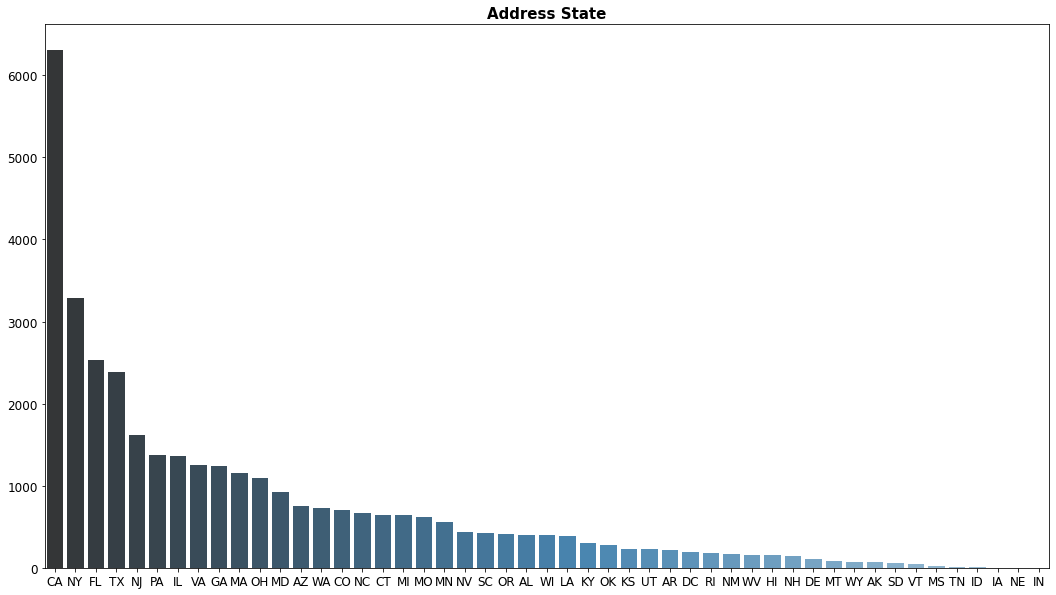

In [66]:
#plot count plot for address state
plt.figure(figsize=(18,10))
palette = sns.color_palette("Blues_d", n_colors=52)
palette.reverse()
sns.countplot(x = 'addr_state', data = loan_clean, palette = palette, 
              order = loan_clean.addr_state.value_counts().index).set(xlabel = None, ylabel = None)
plt.title('Address State', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Not surprising that California is the state with more number of loans and other states like NY, FL, TX are in the top of the list. Looks liek ti is more correlated with the population of the states. 

### Debit to Income Ratio (DTI)

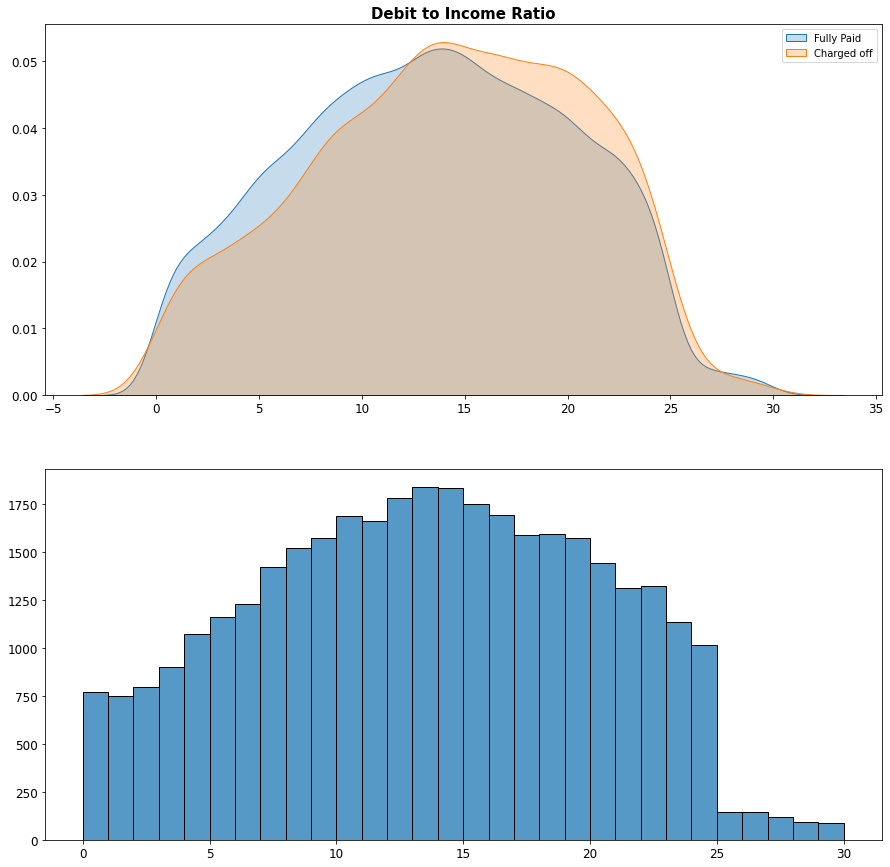

In [67]:
#Plot dti data distribution in kde and histogram plots
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.kdeplot(data = loan_paid, x ='dti', fill = bool, label = 'Fully Paid').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_charged, x ='dti', fill = bool, label = 'Charged off').set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Debit to Income Ratio", fontsize = 15, fontweight = 'bold')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
sns.histplot(data=loan_clean, x="dti", bins = 30).set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

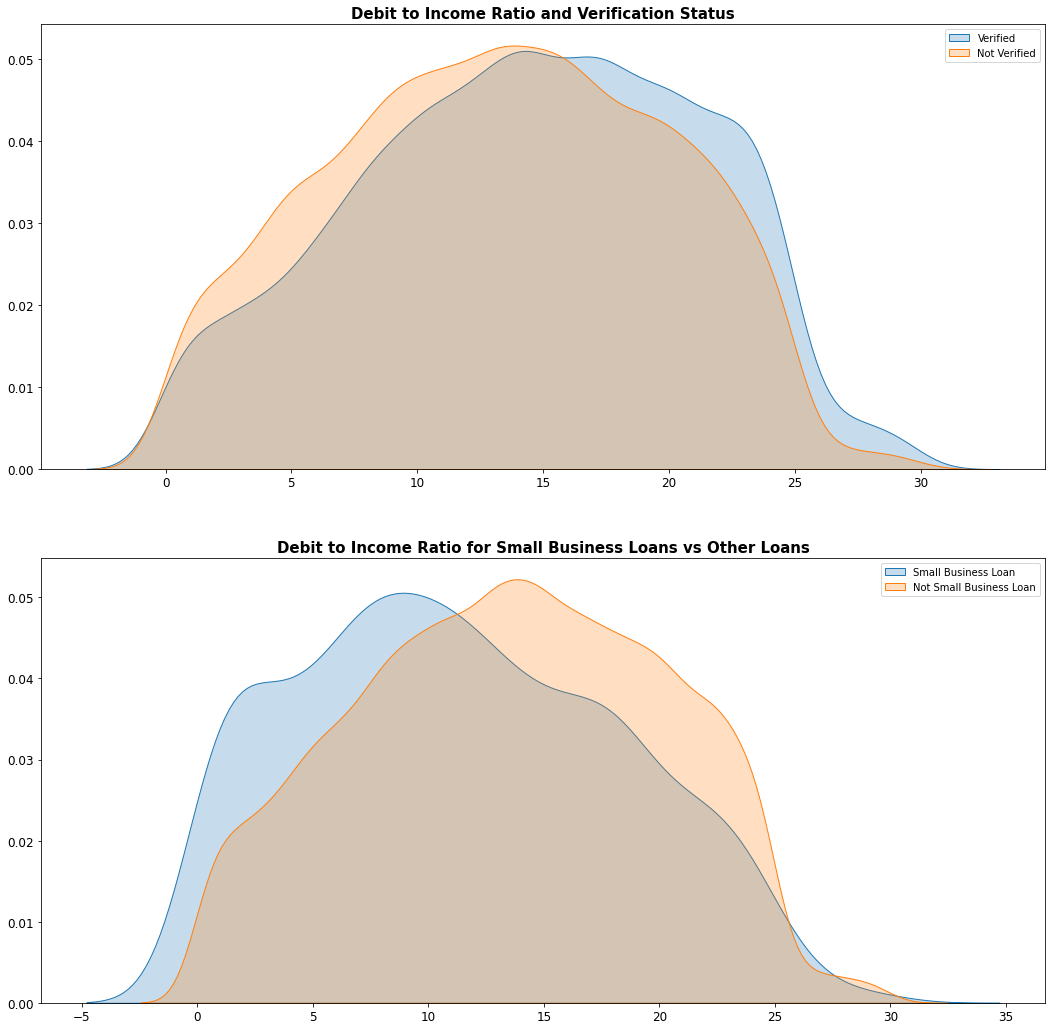

In [68]:
# Plot 2 kde plots to check how the dti change base on verification status and if the purpose of the loan is 
#for small business or not
plt.figure(figsize=(18,18))
plt.subplot(2,1,1)
sns.kdeplot(data = loan_clean.loc[loan_clean['verification_status'] == 'Verified'], x ='dti', 
            fill = bool, label = 'Verified').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_clean.loc[loan_clean['verification_status'] == 'Not Verified'], x ='dti', 
            fill = bool, label = 'Not Verified').set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Debit to Income Ratio and Verification Status", fontsize = 15, fontweight = 'bold')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
sns.kdeplot(data = loan_clean.loc[loan_clean['purpose'] == 'small_business'], x ='dti', 
            fill = bool, label = 'Small Business Loan').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_clean.loc[loan_clean['verification_status'] != 'small_business'], x ='dti', 
            fill = bool, label = 'Not Small Business Loan').set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Debit to Income Ratio for Small Business Loans vs Other Loans", fontsize = 15, fontweight = 'bold')
plt.legend(loc='upper right')
plt.show()

## **3. Borrower Loan History Features**

### Delinquency in Last 2 year

In [69]:
#check the frequency of each category
loan_clean.delinq_2yrs.value_counts()

0     31257
1      2907
2       581
3       188
4        53
5        19
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [70]:
#change the column to be 0 if no delinquency and 1 if such a delinquency occured
loan_clean.delinq_2yrs = np.where(loan_clean.delinq_2yrs > 0, 1, 0)
loan_paid.delinq_2yrs = np.where(loan_paid.delinq_2yrs > 0, 1, 0)
loan_charged.delinq_2yrs = np.where(loan_charged.delinq_2yrs > 0, 1, 0)

/Users/rabia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


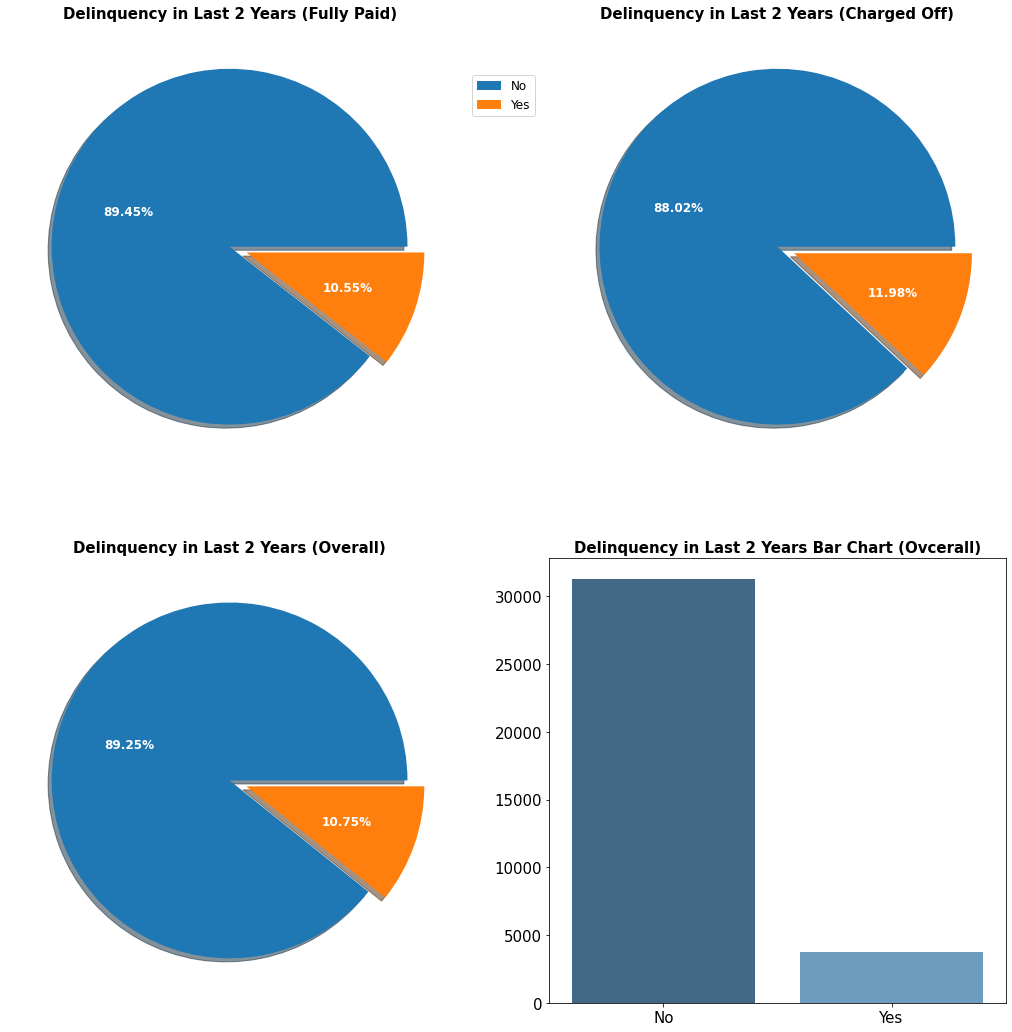

In [71]:
# plot pie charts shows the percentage of delinquency in the last 2 years for all loan status and over all.
# In addition a count plot for overall counts is included
plt.figure(figsize=(18,18))

plt.subplot(2,2,1)
size = loan_paid['delinq_2yrs'].value_counts().tolist()
labels = ['No', 'Yes']
explode = [0, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Delinquency in Last 2 Years (Fully Paid)', fontsize = 15, fontweight = 'bold')
plt.axis('off')

plt.subplot(2,2,2)
size = loan_charged['delinq_2yrs'].value_counts().tolist()
labels = ['No', 'Yes']
explode = [0, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Delinquency in Last 2 Years (Charged Off)', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(-0.2,0.9), prop={'size': 12}, loc="upper left")
plt.axis('off')

plt.subplot(2,2,3)
size = loan_clean['delinq_2yrs'].value_counts().tolist()
labels = ['No', 'Yes']
explode = [0, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Delinquency in Last 2 Years (Overall)', fontsize = 15, fontweight = 'bold')
plt.axis('off')

plt.subplot(2,2,4)
palette = sns.color_palette("Blues_d", n_colors=2)
palette.reverse()
ax = sns.countplot(x = 'delinq_2yrs', data = loan_clean, palette = palette, 
              order = loan_clean.delinq_2yrs.value_counts().index)
ax.set_xticklabels(['No', 'Yes'])
ax.set(xlabel = None, ylabel = None)
plt.title('Delinquency in Last 2 Years Bar Chart (Ovcerall)', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### Inquires in Last 6 Months

In [72]:
#check the frequency of each category
loan_clean.inq_last_6mths.value_counts()

0    17083
1     9694
2     5104
3     2653
4      269
5      128
6       53
7       30
8        9
Name: inq_last_6mths, dtype: int64

In [73]:
#get bthe list of the categories
count3 = loan_clean.inq_last_6mths.value_counts()
count3.index.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [74]:
#get the top 4 categories
top4 = count3[:4].index
top4

Int64Index([0, 1, 2, 3], dtype='int64')

In [75]:
#combine all values out of the top 4 under '>3' category
loan_clean.inq_last_6mths = loan_clean.inq_last_6mths.where(loan_clean.inq_last_6mths.isin(top4), '>3')
loan_paid.inq_last_6mths = loan_paid.inq_last_6mths.where(loan_paid.inq_last_6mths.isin(top4), '>3')
loan_charged.inq_last_6mths = loan_charged.inq_last_6mths.where(loan_charged.inq_last_6mths.isin(top4), '>3')

/Users/rabia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


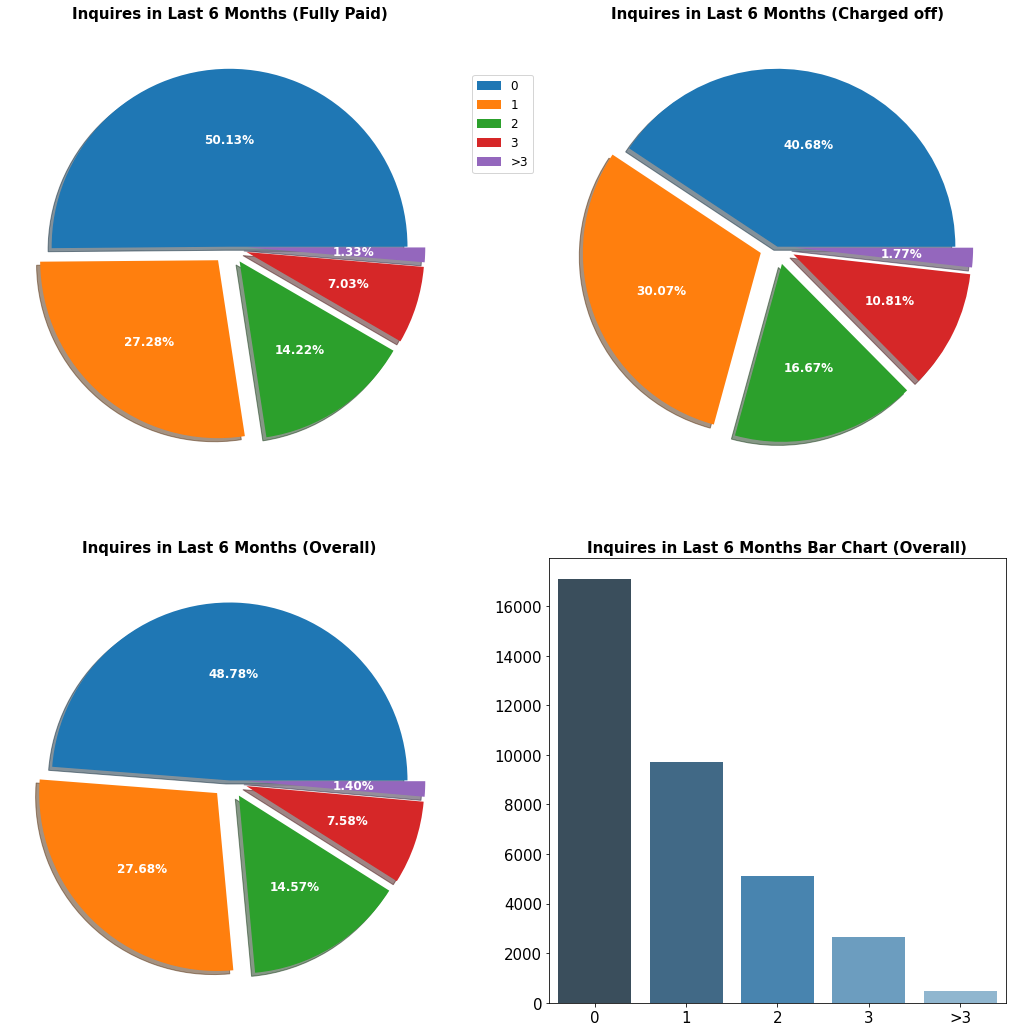

In [76]:
# plot pie charts shows the percentage of inquires in last 6 months for all loan status and over all.
# In addition a count plot for overall counts is included
plt.figure(figsize=(18,18))

plt.subplot(2,2,1)
size = loan_paid['inq_last_6mths'].value_counts().tolist()
labels = loan_paid.inq_last_6mths.value_counts().index
explode = [0, 0.1, 0.1, 0.1, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Inquires in Last 6 Months (Fully Paid)', fontsize = 15, fontweight = 'bold')
plt.axis('off')

plt.subplot(2,2,2)
size = loan_charged['inq_last_6mths'].value_counts().tolist()
labels = loan_charged.inq_last_6mths.value_counts().index
explode = [0, 0.1, 0.1, 0.1, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Inquires in Last 6 Months (Charged off)', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(-0.2,0.9), prop={'size': 12}, loc="upper left")
plt.axis('off')


plt.subplot(2,2,3)
size = loan_clean['inq_last_6mths'].value_counts().tolist()
labels = loan_clean.inq_last_6mths.value_counts().index
explode = [0, 0.1, 0.1, 0.1, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Inquires in Last 6 Months (Overall)', fontsize = 15, fontweight = 'bold')
plt.axis('off')

plt.subplot(2,2,4)
palette = sns.color_palette("Blues_d", n_colors=5)
palette.reverse()
sns.countplot(x = 'inq_last_6mths', data = loan_clean, palette = palette, 
              order = loan_clean.inq_last_6mths.value_counts().index).set(xlabel = None, ylabel = None)
plt.title('Inquires in Last 6 Months Bar Chart (Overall)', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### Total Accounts

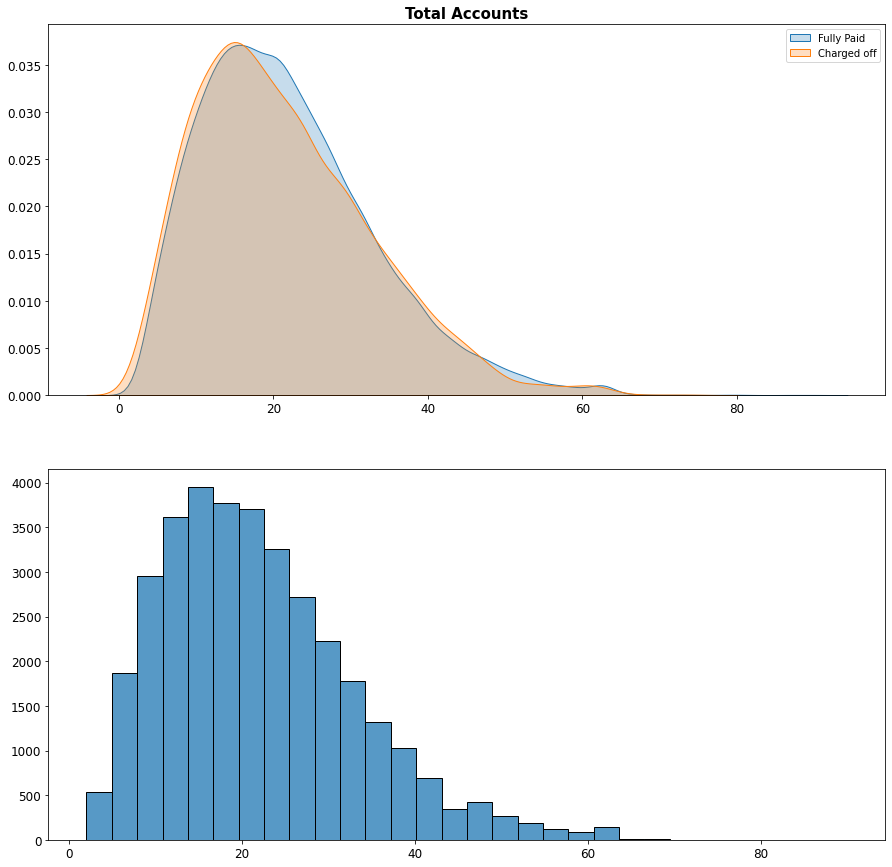

In [77]:
#Plot total accounts data distribution in kde and histogram plots
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.kdeplot(data = loan_paid, x ='total_acc', fill = bool, label = 'Fully Paid').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_charged, x ='total_acc', fill = bool, label = 'Charged off').set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Total Accounts", fontsize = 15, fontweight = 'bold')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
sns.histplot(data=loan_clean, x="total_acc", bins = 30).set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Open Accounts

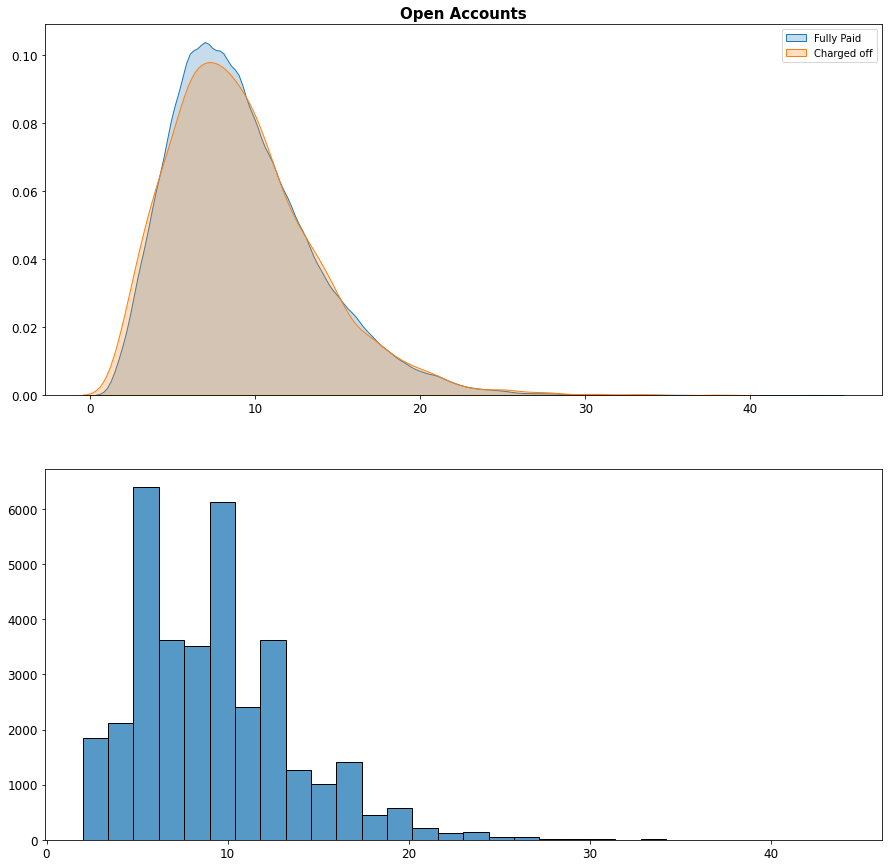

In [78]:
#Plot open accounts data distribution in kde and histogram plots
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.kdeplot(data = loan_paid, x ='open_acc', fill = bool, label = 'Fully Paid').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_charged, x ='open_acc', fill = bool, label = 'Charged off').set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Open Accounts", fontsize = 15, fontweight = 'bold')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
sns.histplot(data=loan_clean, x="open_acc", bins = 30).set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Closed Accounts

In [79]:
#create varibale by subtracting total accounts from open accounts
loan_clean['closed_acc'] = loan_clean.apply(lambda x: x['total_acc'] - x['open_acc'], axis=1)
loan_paid['closed_acc'] = loan_paid.apply(lambda x: x['total_acc'] - x['open_acc'], axis=1)
loan_charged['closed_acc'] = loan_charged.apply(lambda x: x['total_acc'] - x['open_acc'], axis=1)

/var/folders/z4/qmnvxx9x3pzbm0w1wf_dd8z80000gp/T/ipykernel_44167/1418533802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean['closed_acc'] = loan_clean.apply(lambda x: x['total_acc'] - x['open_acc'], axis=1)
/var/folders/z4/qmnvxx9x3pzbm0w1wf_dd8z80000gp/T/ipykernel_44167/1418533802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_paid['closed_acc'] = loan_paid.apply(lambda x: x['total_acc'] - x['open_acc'], axis=1)
/var/folders/z4/qmnvxx9x3pzbm0w1wf_dd8z80000gp/T/ipykernel_44167/14185

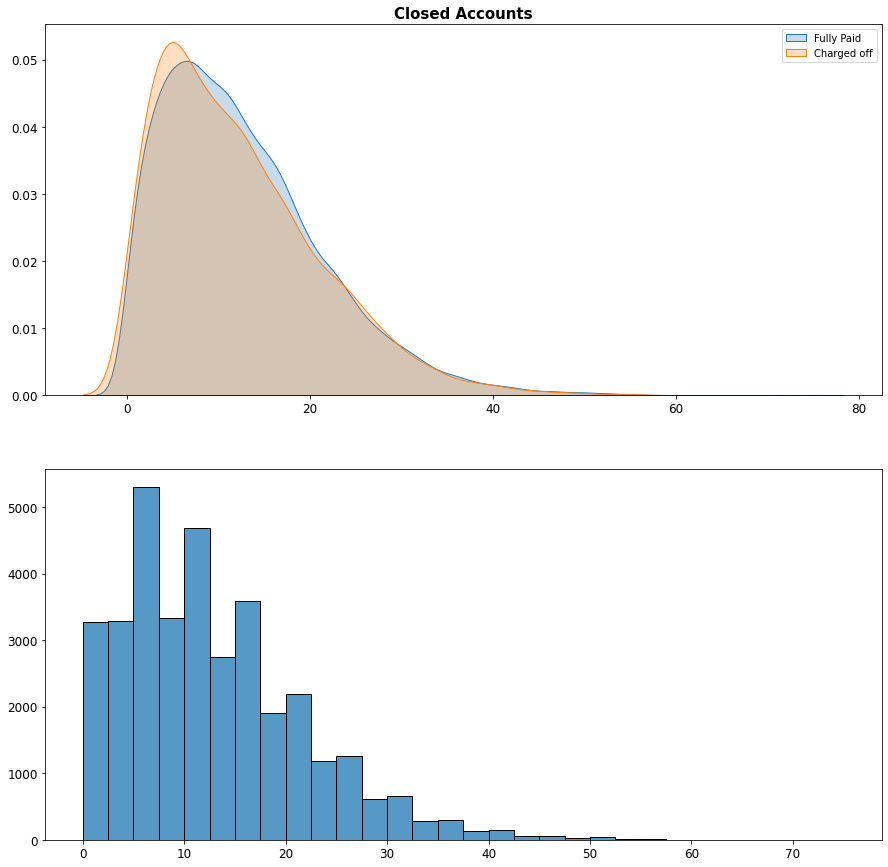

In [80]:
#Plot closed accounts data distribution in kde and histogram plots
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.kdeplot(data = loan_paid, x ='closed_acc', fill = bool, label = 'Fully Paid').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_charged, x ='closed_acc', fill = bool, label = 'Charged off').set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Closed Accounts", fontsize = 15, fontweight = 'bold')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
sns.histplot(data=loan_clean, x="closed_acc", bins = 30).set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Revolving Balance

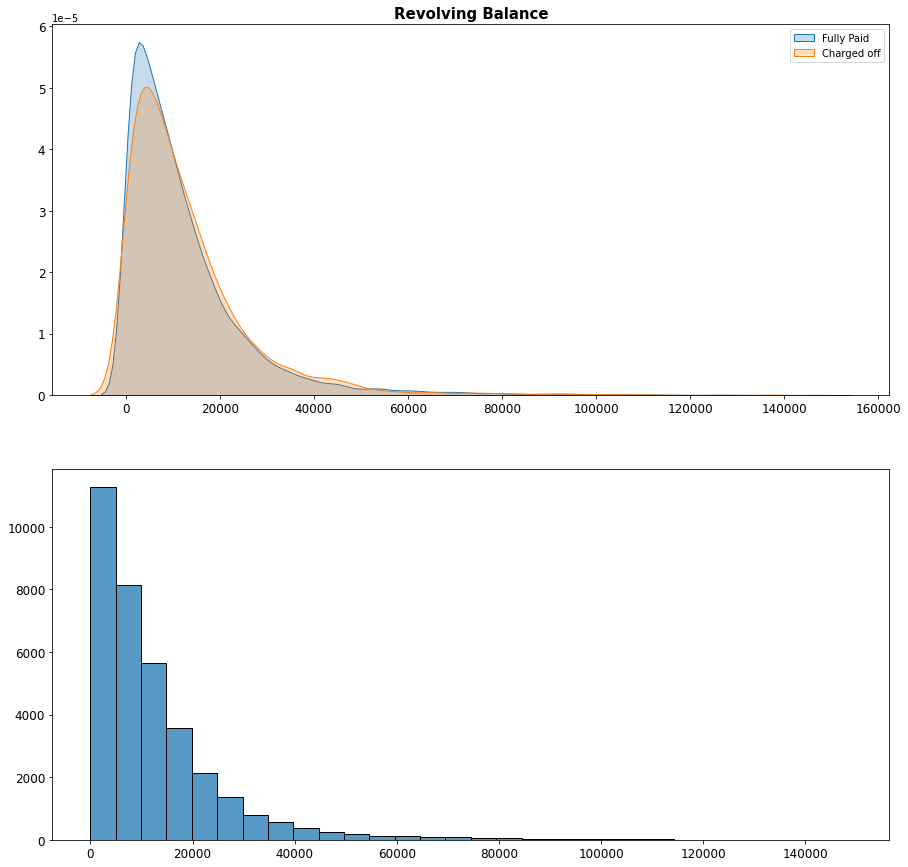

In [81]:
#Plot revolving balance data distribution in kde and histogram plots
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.kdeplot(data = loan_paid, x ='revol_bal', fill = bool, label = 'Fully Paid').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_charged, x ='revol_bal', fill = bool, label = 'Charged off').set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Revolving Balance", fontsize = 15, fontweight = 'bold')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
sns.histplot(data=loan_clean, x="revol_bal", bins = 30).set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

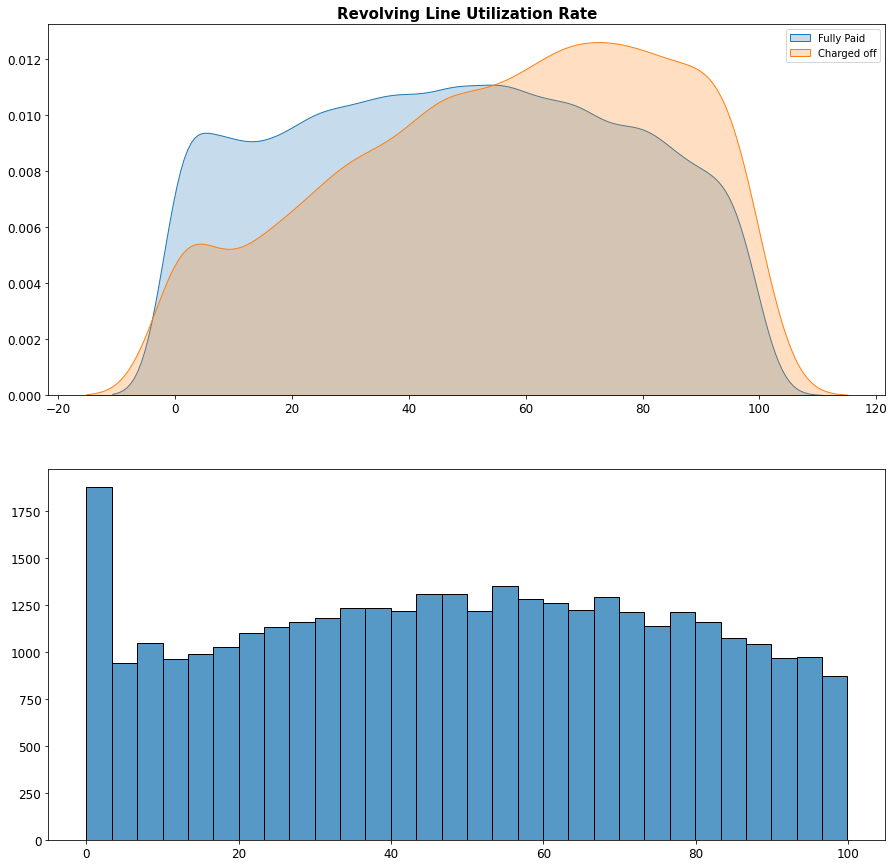

In [82]:
#Plot revolving utilization data distribution in kde and histogram plots
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.kdeplot(data = loan_paid, x ='revol_util', fill = bool, label = 'Fully Paid').set(xlabel = None, ylabel = None)
sns.kdeplot(data = loan_charged, x ='revol_util', fill = bool, label = 'Charged off').set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Revolving Line Utilization Rate", fontsize = 15, fontweight = 'bold')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
sns.histplot(data=loan_clean, x="revol_util", bins = 30).set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()